In [25]:
import pandas as pd
import numpy as np
from scipy.stats import spearmanr
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import allel 
import seaborn as sns
import allel
import os
import pickle

import dask.dataframe as dd

In [1]:
!pwd

/carnegie/nobackup/scratch/tbellagio/gea_grene-net/gwas/fitness_gwas


In [26]:
dict_snps = '/carnegie/nobackup/scratch/tbellagio/gea_grene-net/key_files/var_pos_grenenet.csv'
dict_snps = pd.read_csv(dict_snps)

In [27]:
dict_blocks = '/home/tbellagio/HapFM/blocks_snpsid_dict.pkl'

path = '/carnegie/nobackup/scratch/tbellagio/gea_grene-net/gwas/fitness_gwas'

In [28]:
with open(dict_blocks, 'rb') as file:
    dict_blocks = pickle.load(file)

In [29]:
dict_blocks_inv = {}

# Iterate through the original dictionary
for key, values in dict_blocks.items():
    for value in values:
        dict_blocks_inv[value] = key

In [30]:

def list_only_directories(path):
    # List all entries in the directory specified by path
    all_entries = os.listdir(path)
    all_entries = [i for i in os.listdir(path,) if 'site' in i]
    
    # Filter out the entries that are directories
    folder_names = [entry for entry in all_entries if os.path.isdir(os.path.join(path, entry))]
    
    return folder_names

# Usage example
sites = list_only_directories(path)

In [21]:
assoc = pd.read_csv(path + f'/{site}/output/{4}.assoc.txt', sep = '\t')

0.052

In [32]:
for site in sites:
    just_number_site = site.replace('site_', '')
    assoc = pd.read_csv(path + f'/{site}/output/{just_number_site}.assoc.txt', sep = '\t')
    th = 0.05 / len(assoc)
    # Add a new column 'significant' based on the condition
    assoc['significant'] = assoc['p_wald'] < th
    print(assoc['significant'].value_counts())
    assoc['blocks'] = assoc['rs'].map(dict_blocks_inv) 
    assoc = assoc.rename(columns = {'af': 'MAF'})
    assoc[['rs','p_wald', 'beta', 'significant', 'blocks','MAF']].to_csv(path + f'/{site}/output/results_lmm.csv', index=None)

significant
False    1147871
True          21
Name: count, dtype: int64
significant
False    1147834
True          58
Name: count, dtype: int64
significant
False    1147733
True         159
Name: count, dtype: int64
significant
False    1147885
True           7
Name: count, dtype: int64
significant
False    1147798
True          94
Name: count, dtype: int64
significant
False    1147869
True          23
Name: count, dtype: int64
significant
False    1147870
True          22
Name: count, dtype: int64
significant
False    1147885
True           7
Name: count, dtype: int64
significant
False    1147809
True          83
Name: count, dtype: int64
significant
False    1147726
True         166
Name: count, dtype: int64
significant
False    1147803
True          89
Name: count, dtype: int64
significant
False    1147883
True           9
Name: count, dtype: int64
significant
False    1147811
True          81
Name: count, dtype: int64
significant
False    1147817
True          75
Name: count, dtype

In [15]:
sites

['site_46',
 'site_55',
 'site_28',
 'site_10',
 'site_6',
 'site_1',
 'site_60',
 'site_25',
 'site_52',
 'site_32',
 'site_45',
 'site_5',
 'site_13',
 'site_2',
 'site_26',
 'site_42',
 'site_48',
 'site_37',
 'site_53',
 'site_24',
 'site_23',
 'site_54',
 'site_11',
 'site_49',
 'site_43',
 'site_9',
 'site_27',
 'site_57',
 'site_4',
 'site_12',
 'site_33']

In [4]:
site = 'site_4'

In [5]:
pvalues_file = path + f'/{site}/output/results_lmm.csv'

pvalues = dd.read_csv(pvalues_file)
pvalues = pvalues.compute()

pvalues.columns = ['id', 'pvalue','beta', 'significant', 'blocks']

threshold_value = 0.05 / len(pvalues)

In [10]:
pvalues.groupby('blocks')['significant'].sum()[pvalues.groupby('blocks')['significant'].sum() !=0]

blocks
1_1010    2
1_1041    1
1_1042    1
1_1079    1
1_1154    1
         ..
5_606     2
5_724     1
5_736     1
5_757     1
5_953     1
Name: significant, Length: 174, dtype: int64

In [16]:
pvalues_blocks = pvalues.groupby('blocks')['pvalue'].min().reset_index()

In [19]:
pvalues_blocks.sort_values('pvalue').head(10)

blocks        pvalue
5464   2_1295  1.288339e-22
6147   2_1915  3.149070e-22
12716  4_2874  3.248814e-21
2066   1_2873  1.034414e-19
4768    1_663  3.384354e-19
50     1_1042  1.324229e-18
49     1_1041  1.324229e-18
12584  4_2754  2.483407e-18
12569  4_2740  2.483407e-18
12663  4_2826  4.079480e-18

In [6]:
pvalues['chromosome'] = pvalues['id'].str.split('_').str[0].astype(int)

In [15]:
sites = ['site_4', 'site_32']

/tmp/ipykernel_78550/1658760834.py:39: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['adjusted_position'], subset['-log10(pvalue)'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)


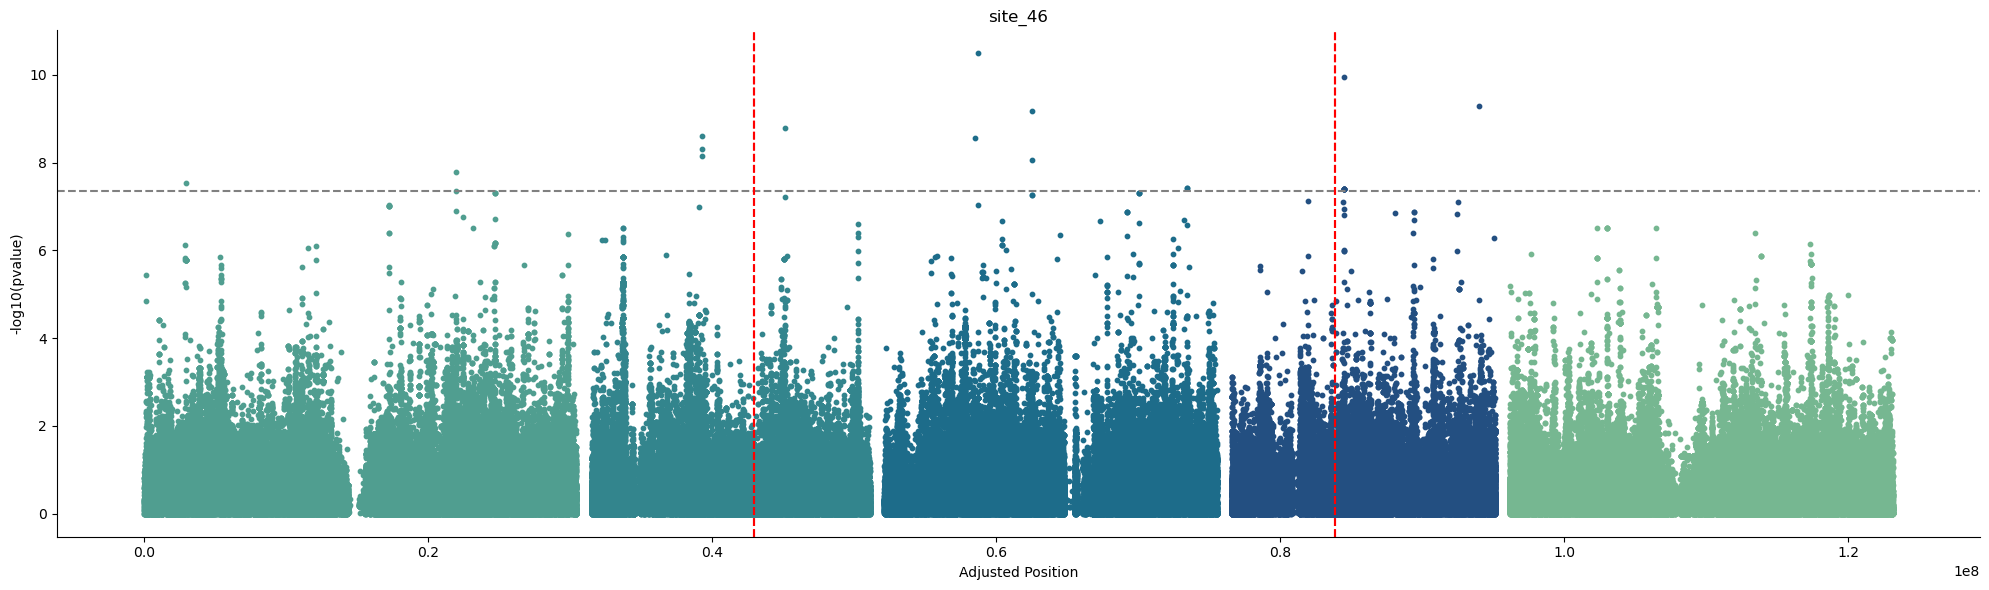

/tmp/ipykernel_78550/1658760834.py:39: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['adjusted_position'], subset['-log10(pvalue)'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)


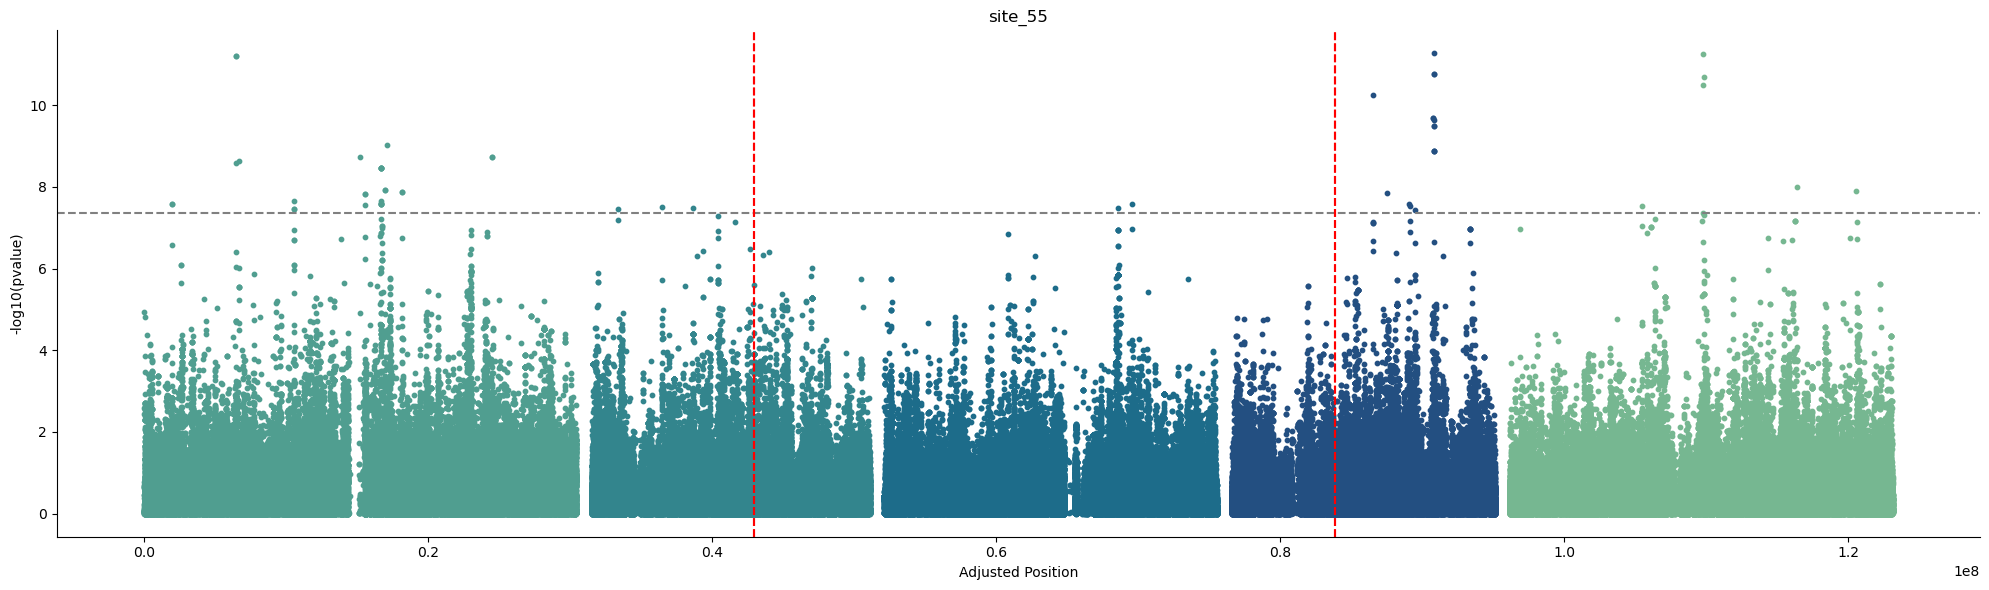

/tmp/ipykernel_78550/1658760834.py:39: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['adjusted_position'], subset['-log10(pvalue)'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)


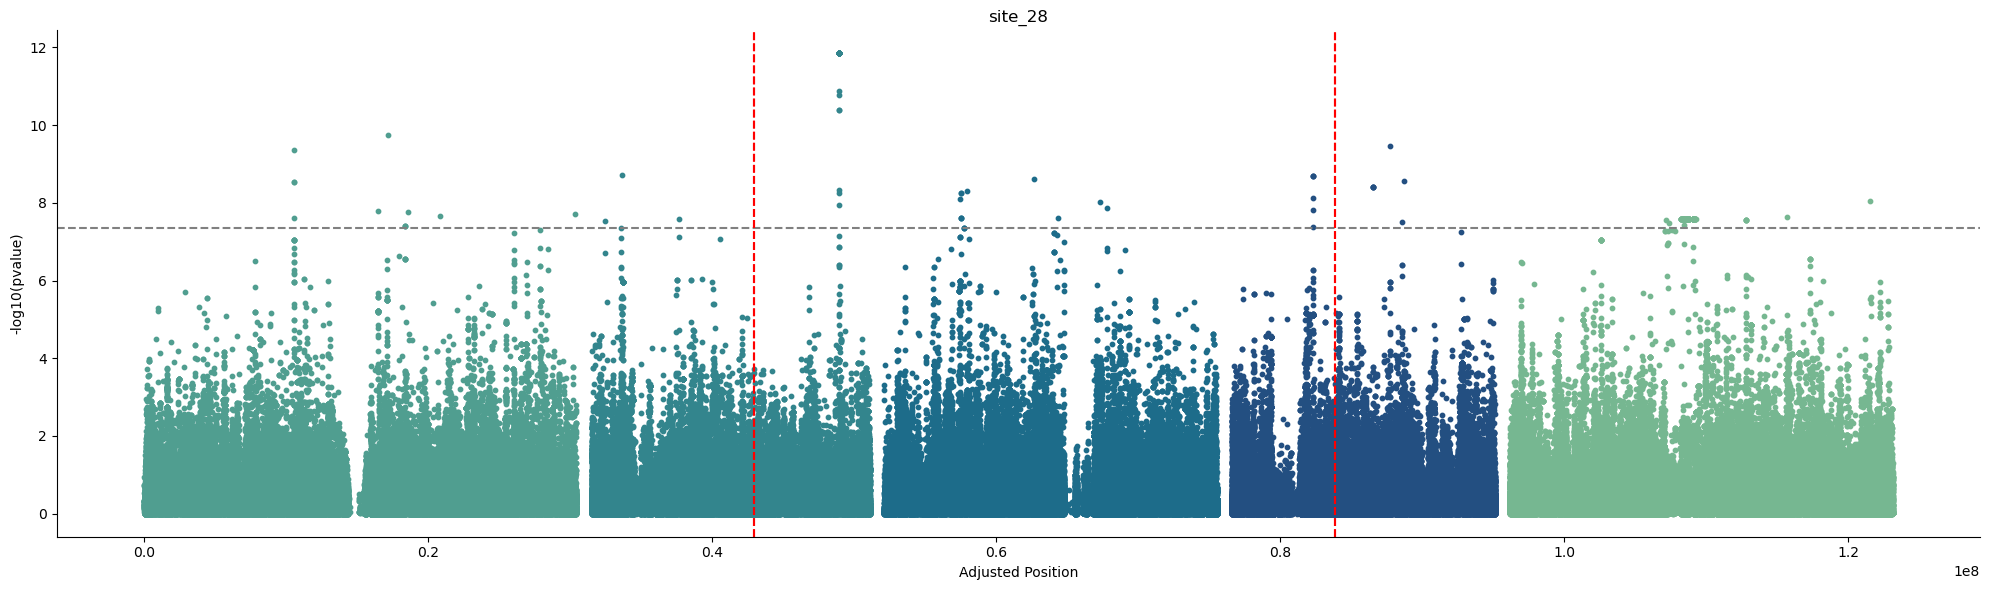

/tmp/ipykernel_78550/1658760834.py:39: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['adjusted_position'], subset['-log10(pvalue)'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)


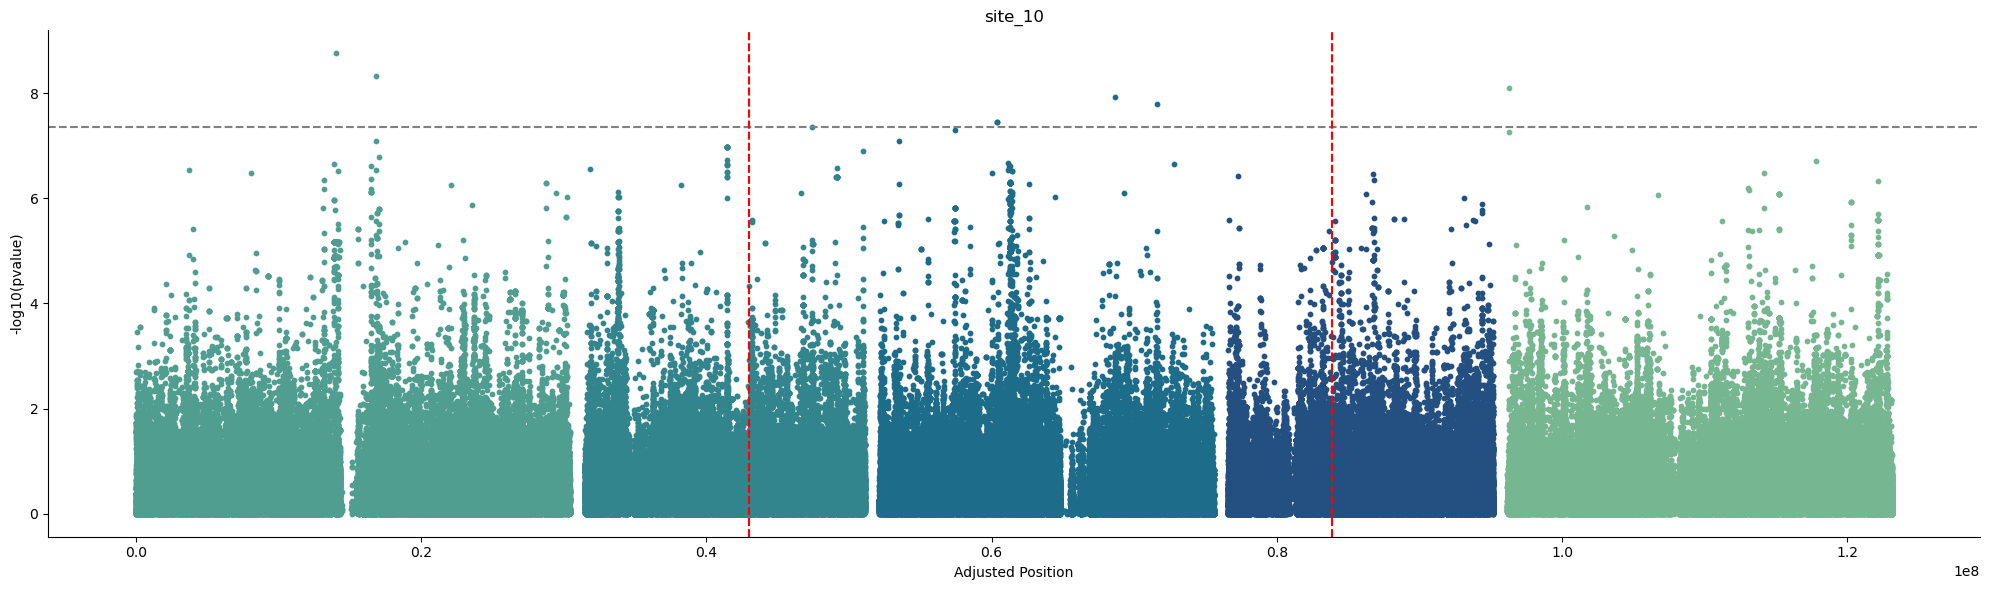

/tmp/ipykernel_78550/1658760834.py:39: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['adjusted_position'], subset['-log10(pvalue)'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)


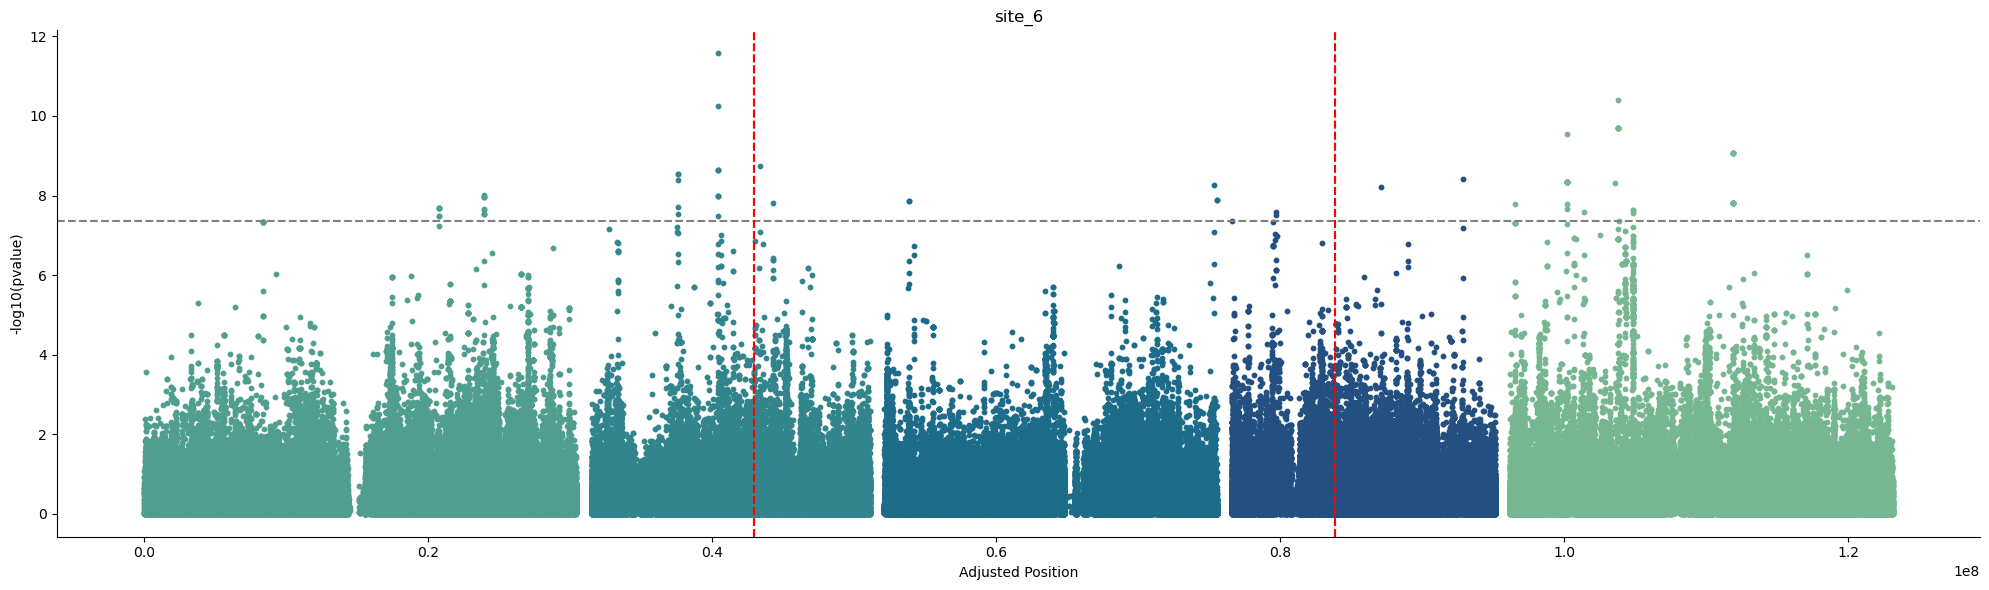

/tmp/ipykernel_78550/1658760834.py:39: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['adjusted_position'], subset['-log10(pvalue)'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)


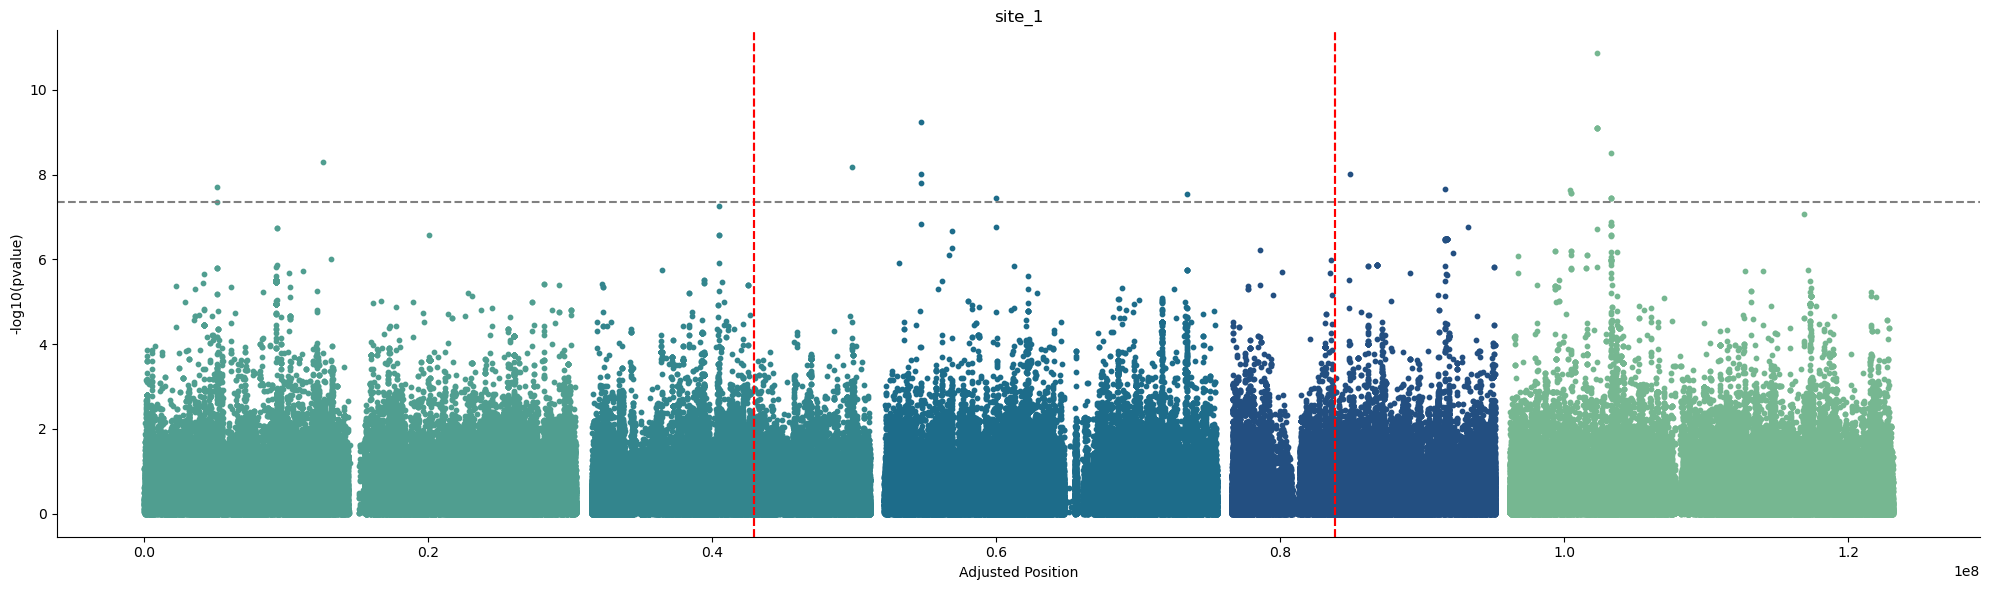

/tmp/ipykernel_78550/1658760834.py:39: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['adjusted_position'], subset['-log10(pvalue)'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)


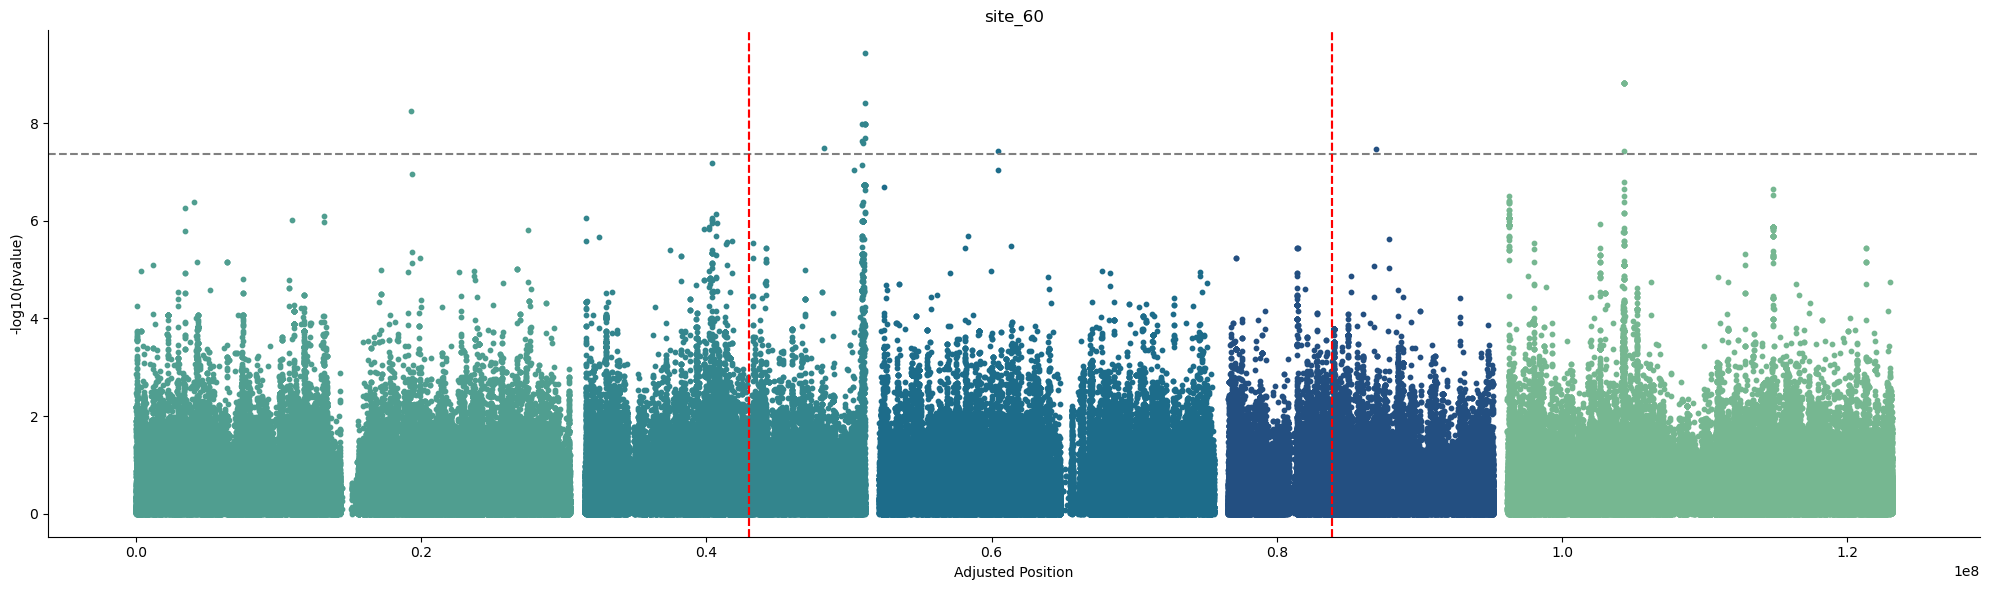

/tmp/ipykernel_78550/1658760834.py:39: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['adjusted_position'], subset['-log10(pvalue)'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)


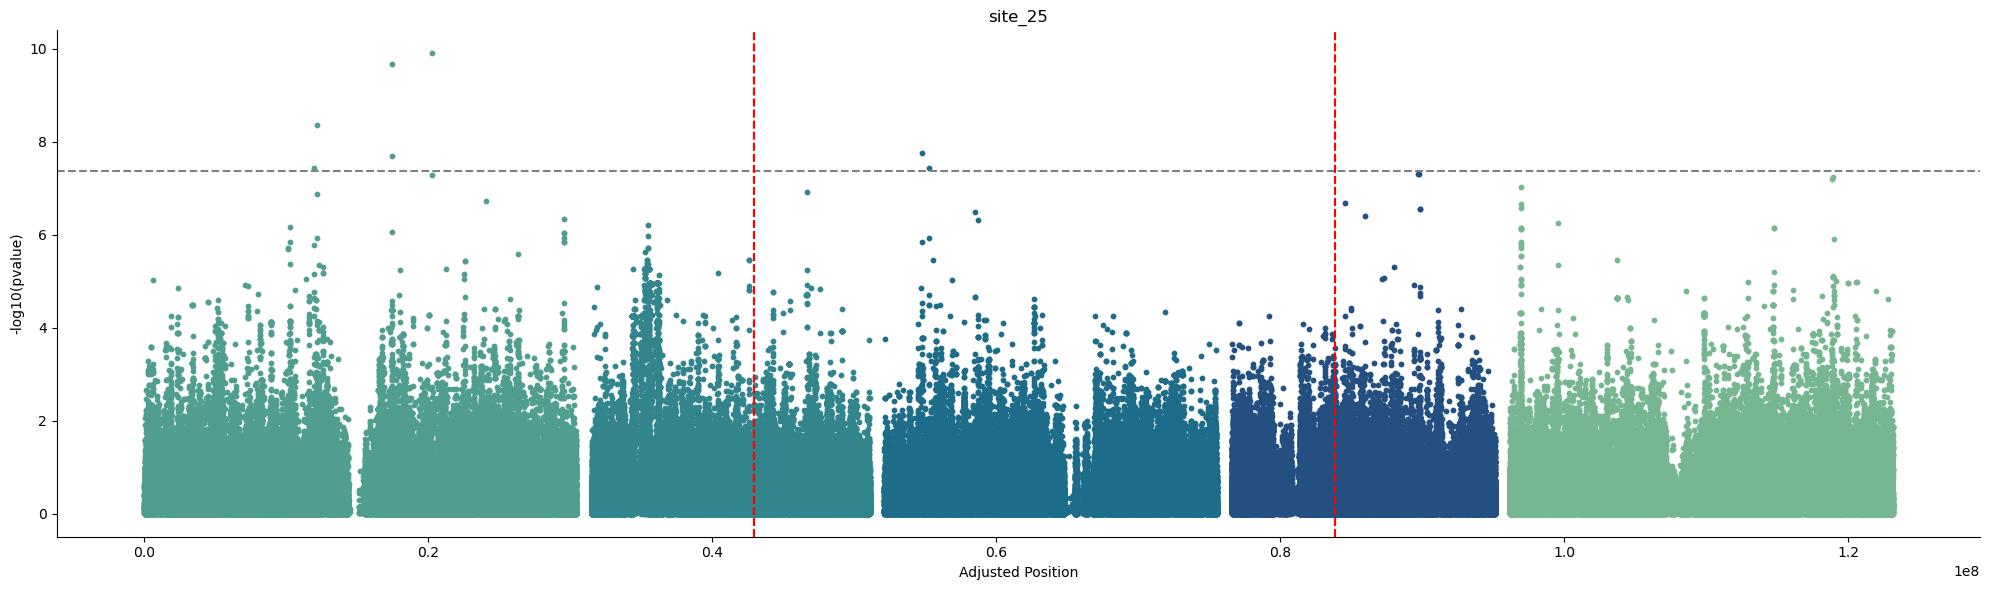

/tmp/ipykernel_78550/1658760834.py:39: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['adjusted_position'], subset['-log10(pvalue)'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)


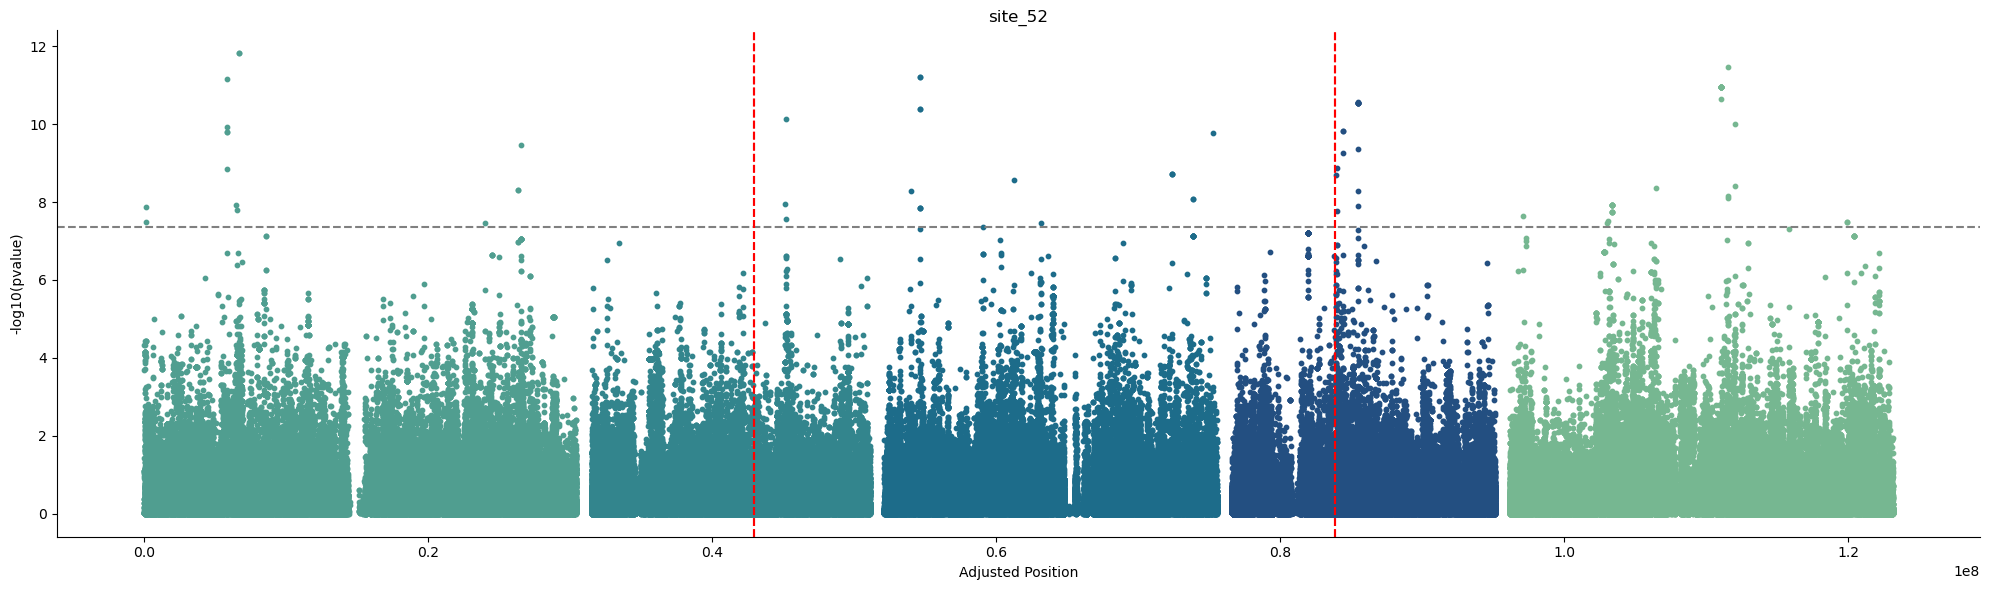

/tmp/ipykernel_78550/1658760834.py:39: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['adjusted_position'], subset['-log10(pvalue)'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)


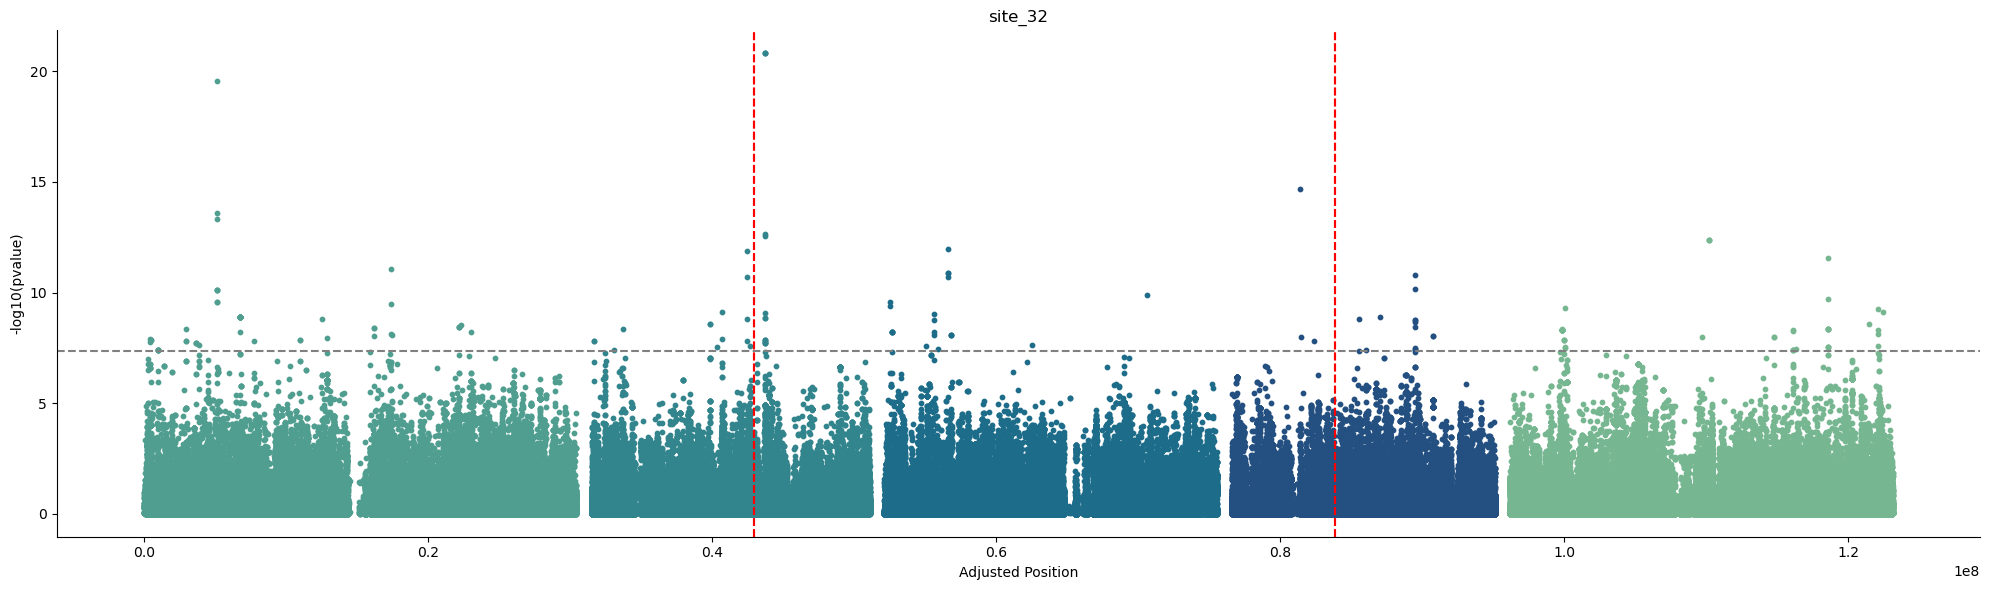

/tmp/ipykernel_78550/1658760834.py:39: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['adjusted_position'], subset['-log10(pvalue)'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)


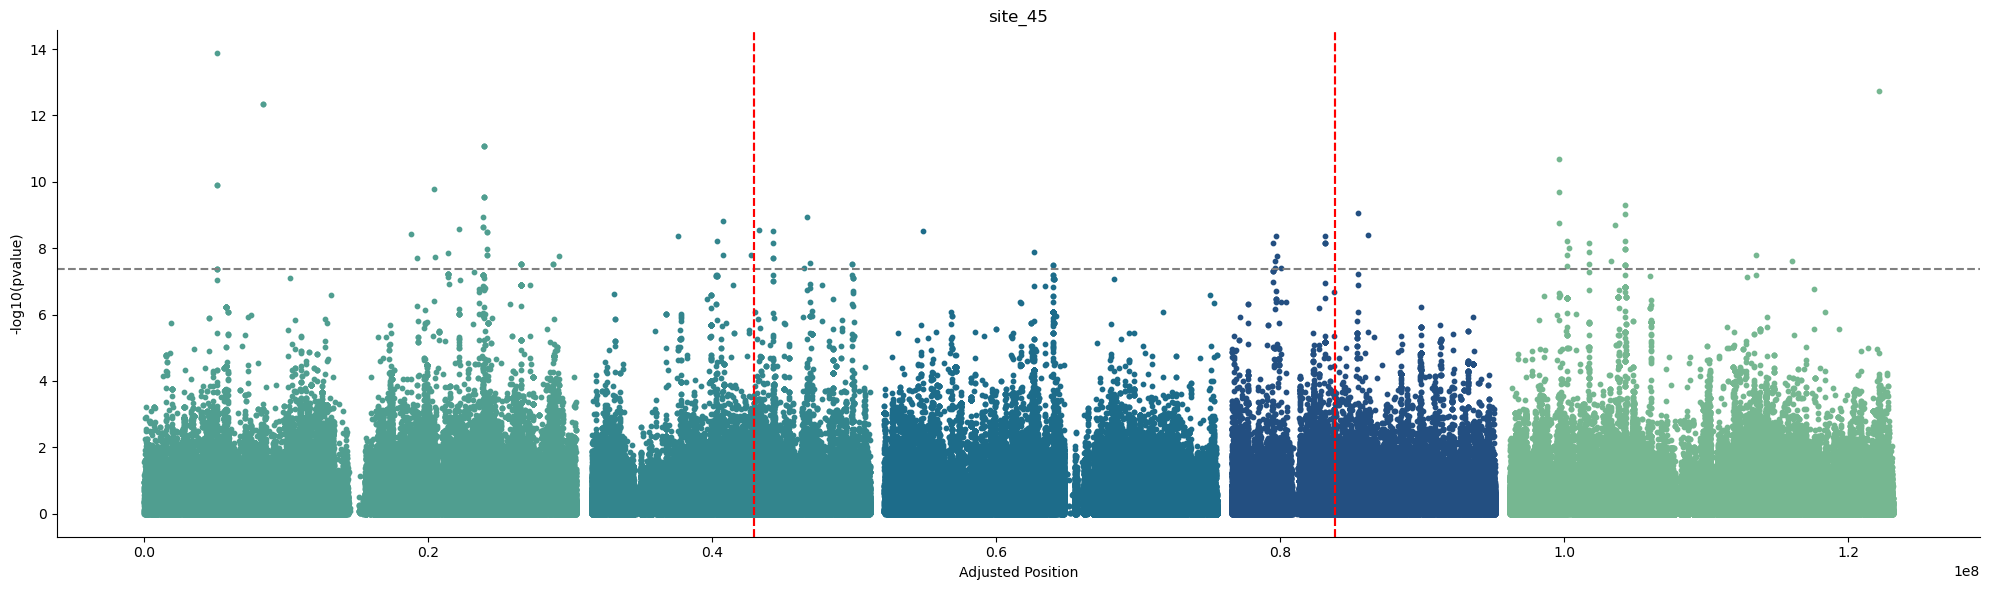

/tmp/ipykernel_78550/1658760834.py:39: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['adjusted_position'], subset['-log10(pvalue)'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)


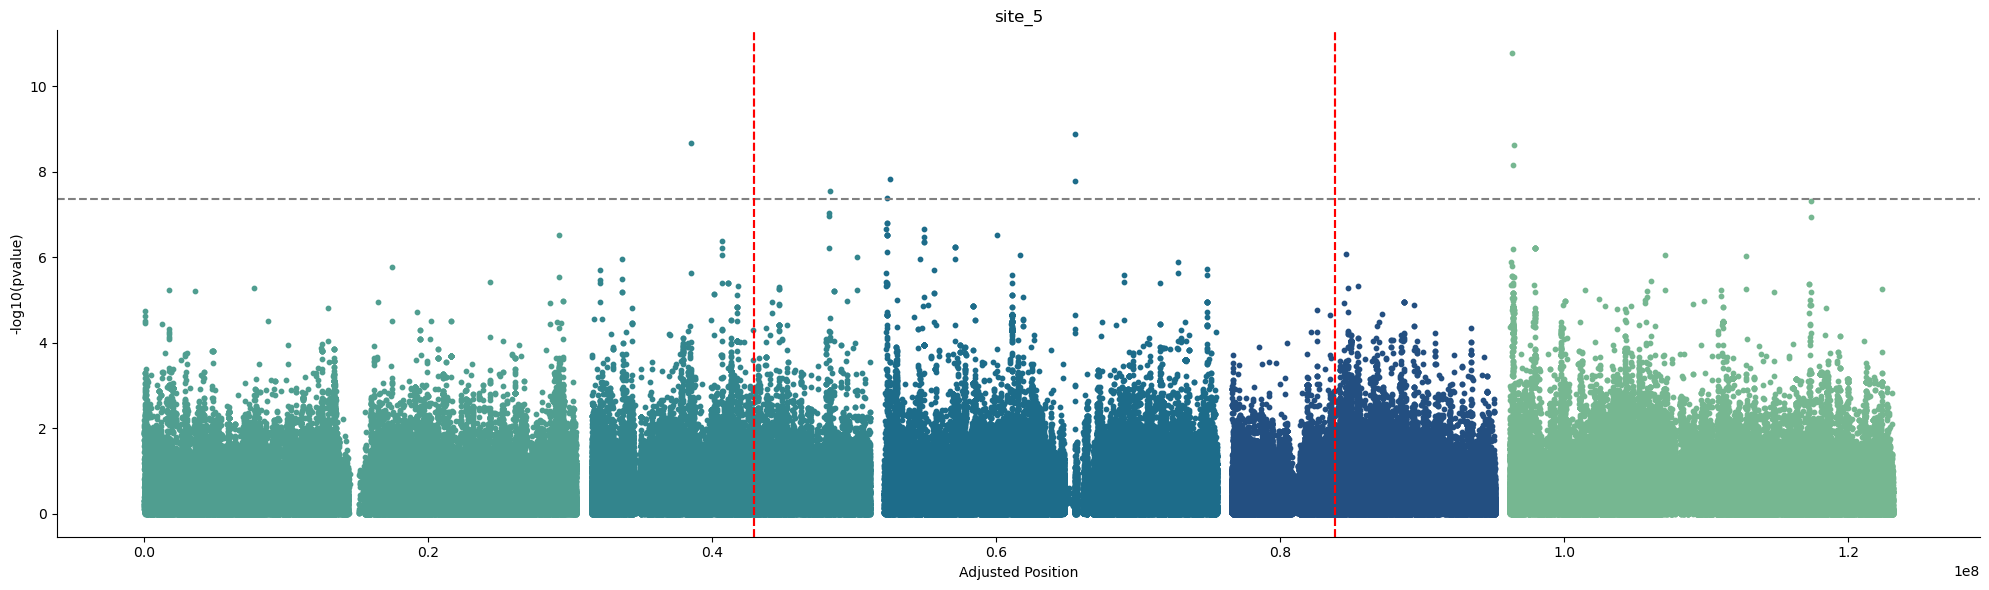

/tmp/ipykernel_78550/1658760834.py:39: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['adjusted_position'], subset['-log10(pvalue)'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)


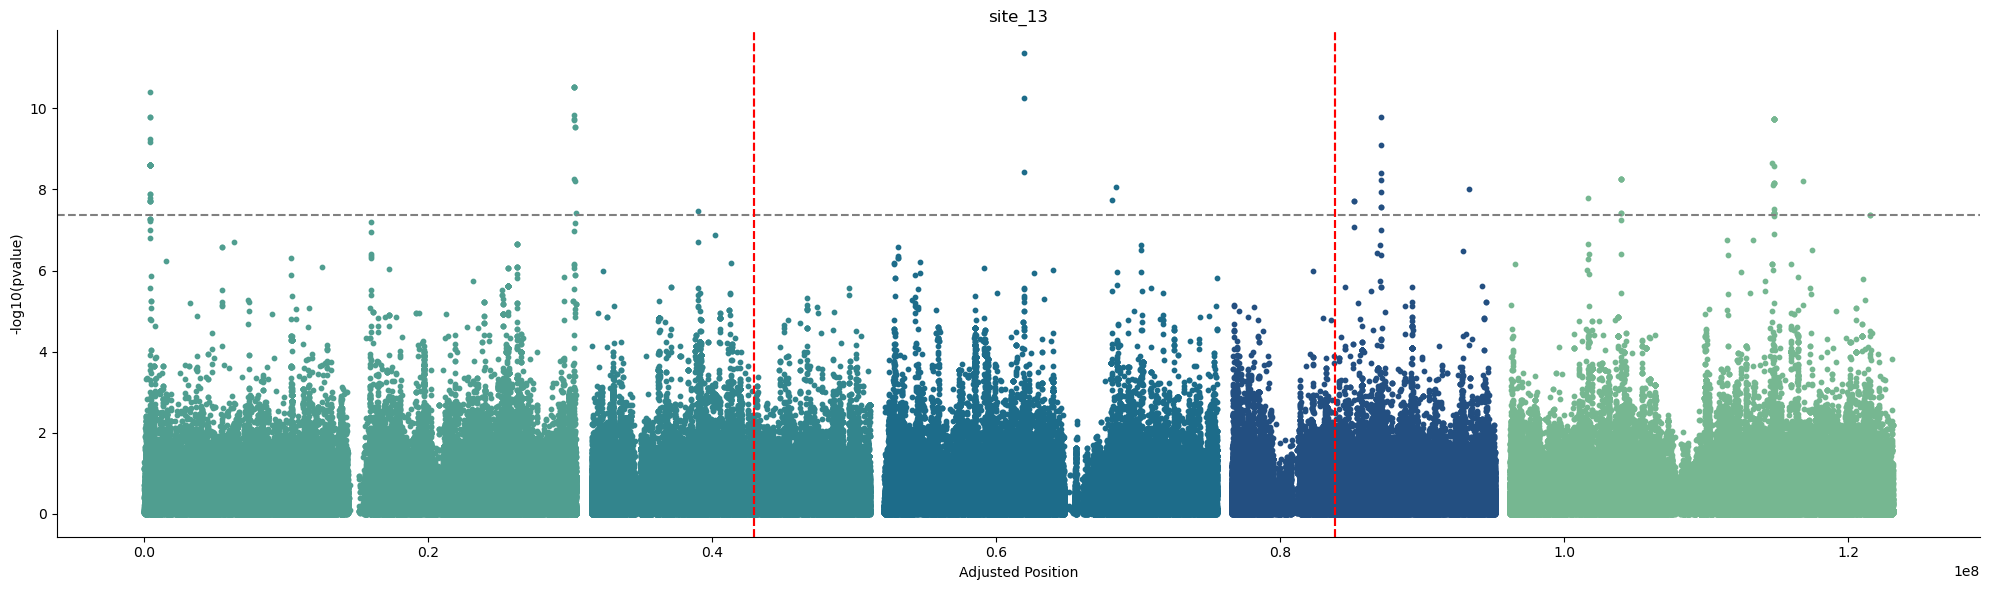

/tmp/ipykernel_78550/1658760834.py:39: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['adjusted_position'], subset['-log10(pvalue)'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)


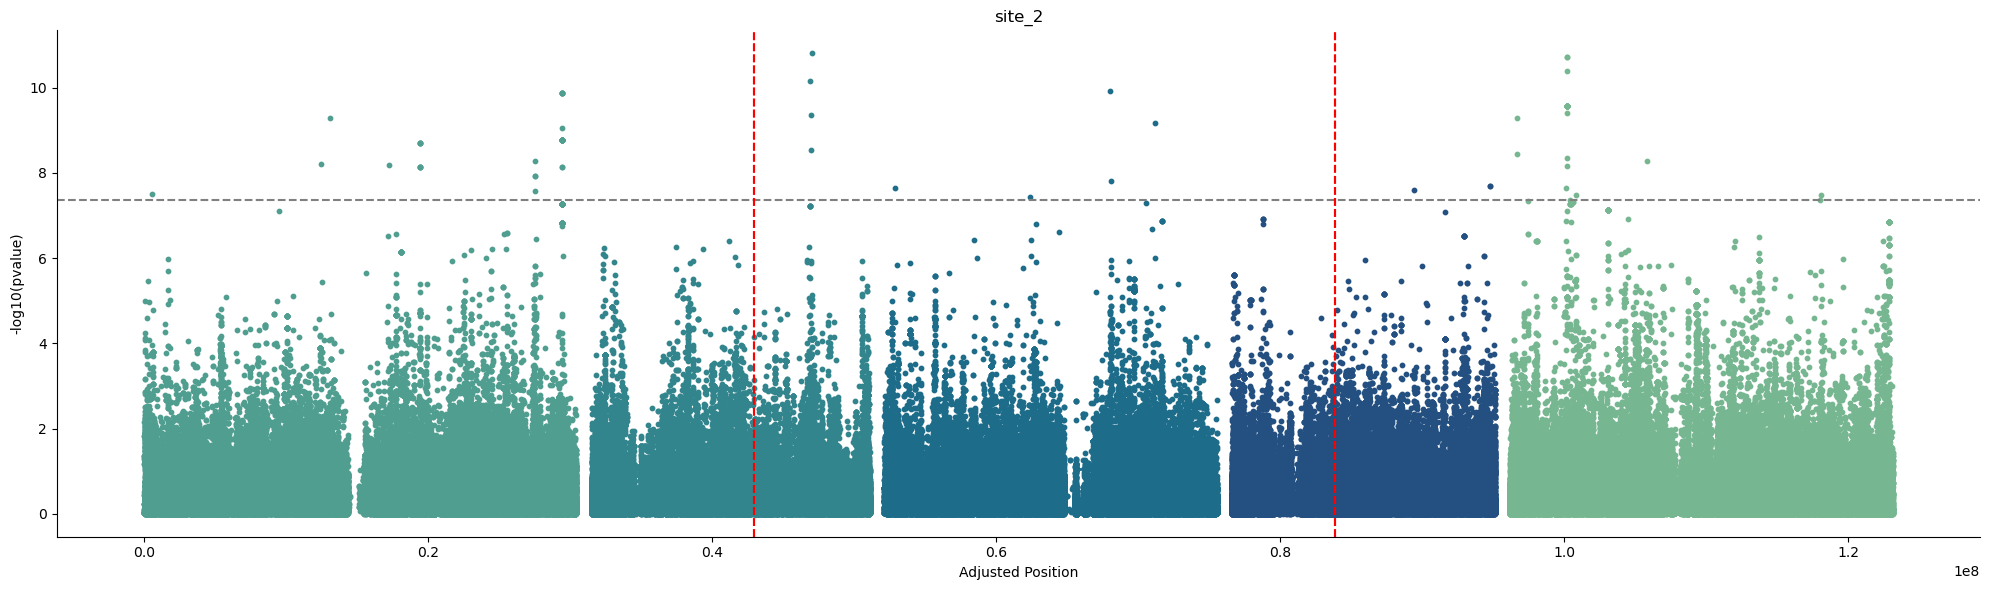

/tmp/ipykernel_78550/1658760834.py:39: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['adjusted_position'], subset['-log10(pvalue)'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)


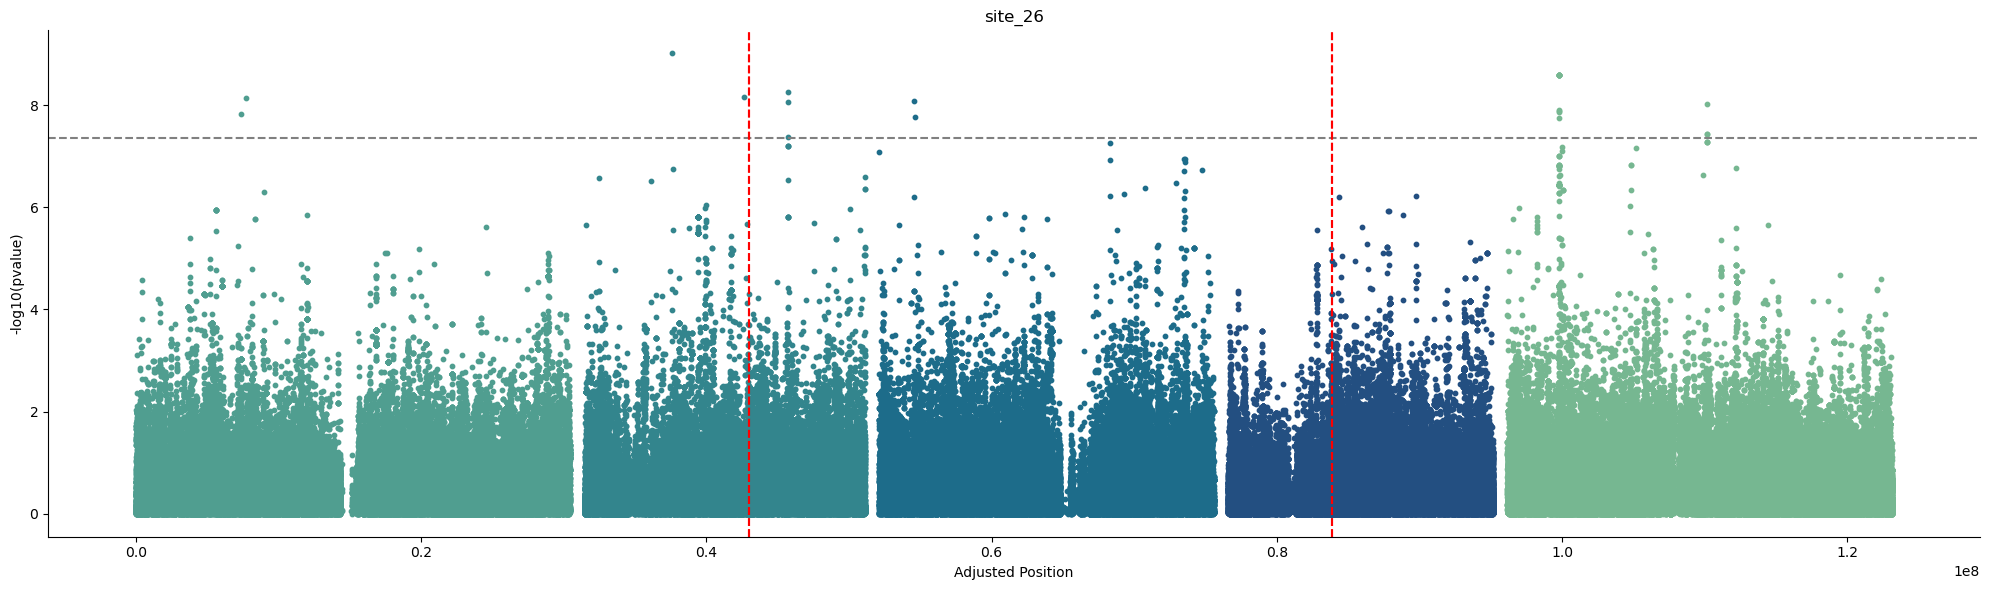

/tmp/ipykernel_78550/1658760834.py:39: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['adjusted_position'], subset['-log10(pvalue)'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)


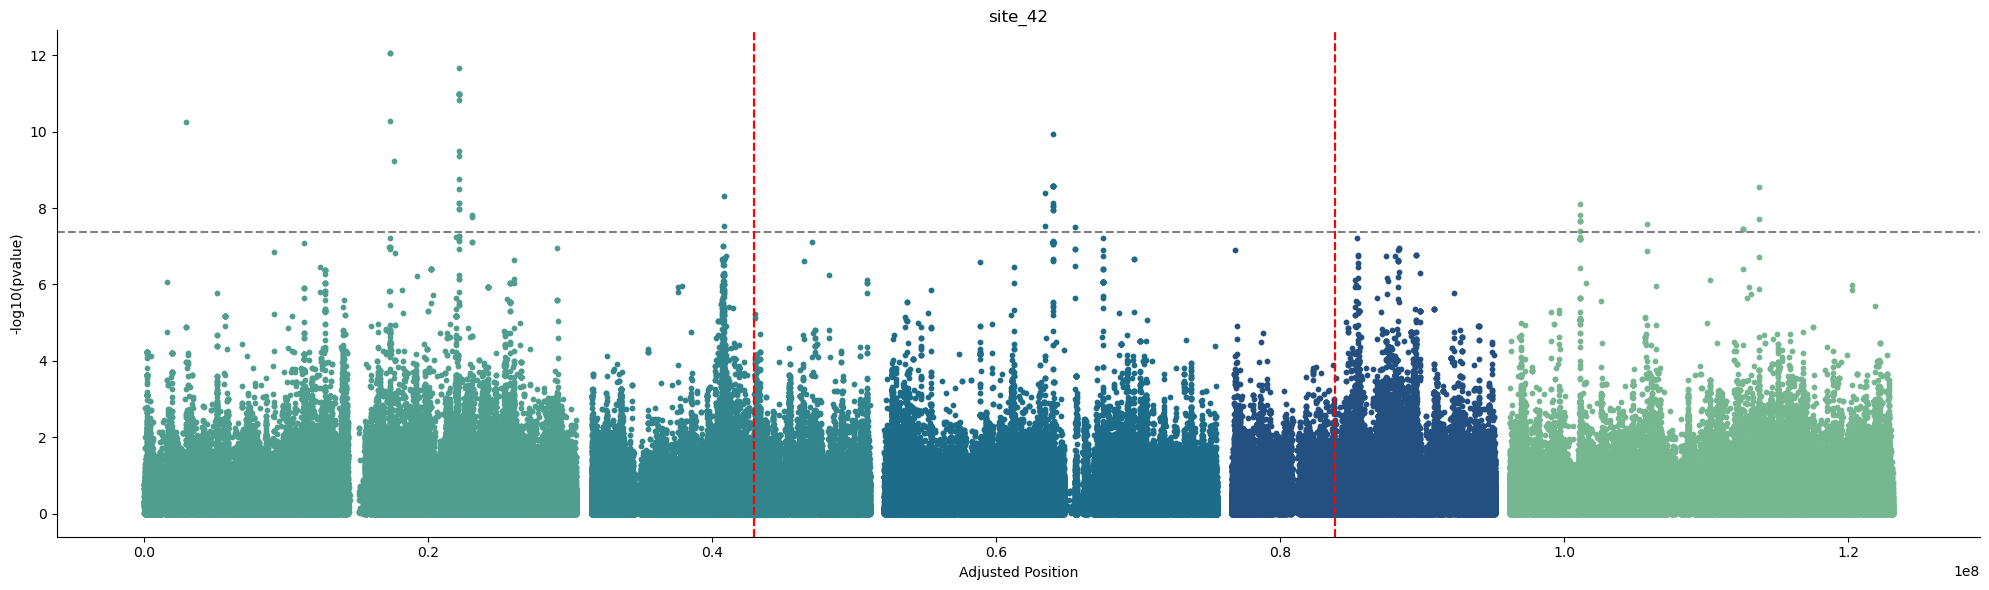

/tmp/ipykernel_78550/1658760834.py:39: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['adjusted_position'], subset['-log10(pvalue)'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)


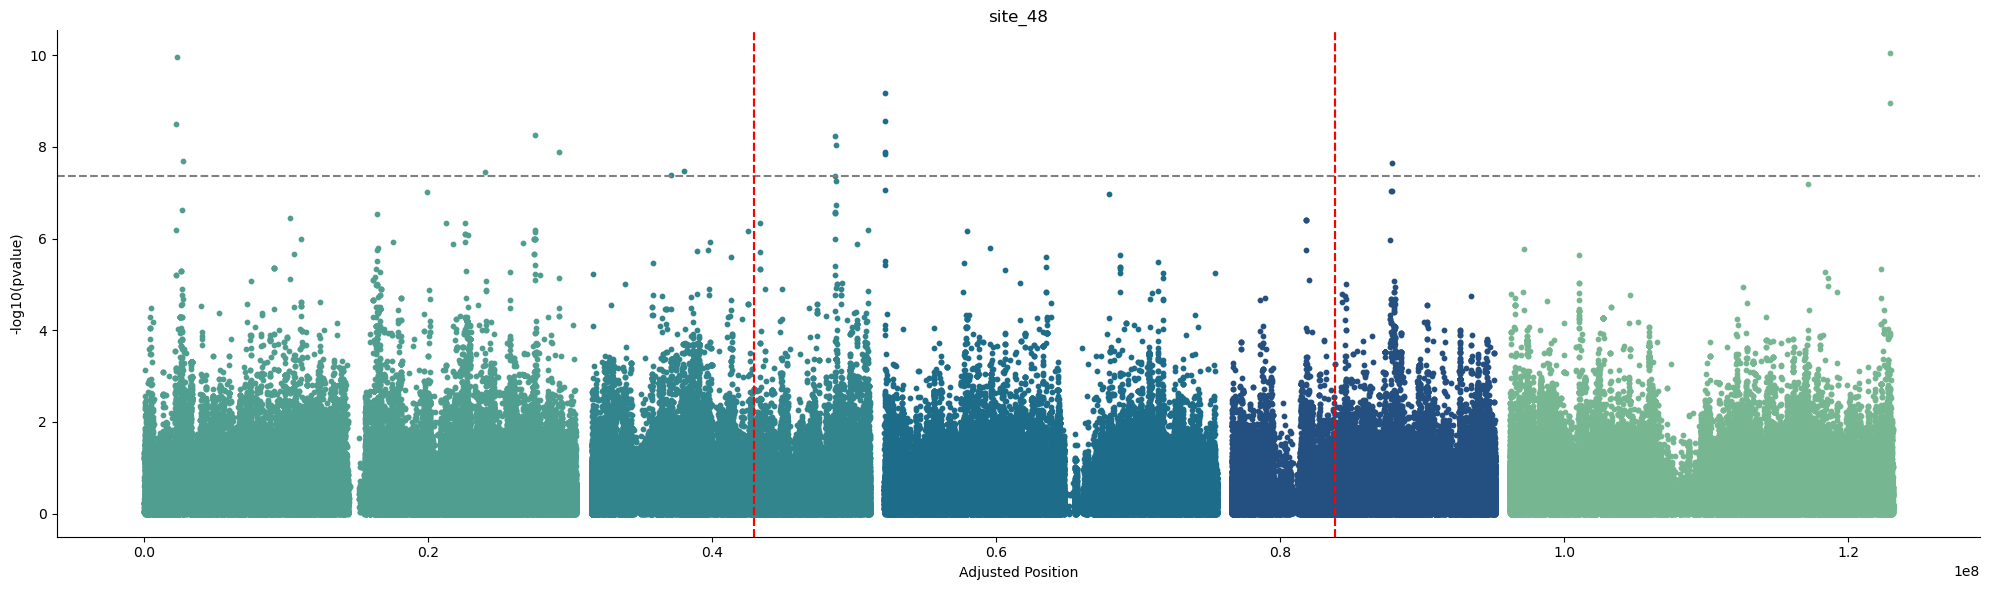

/tmp/ipykernel_78550/1658760834.py:39: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['adjusted_position'], subset['-log10(pvalue)'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)


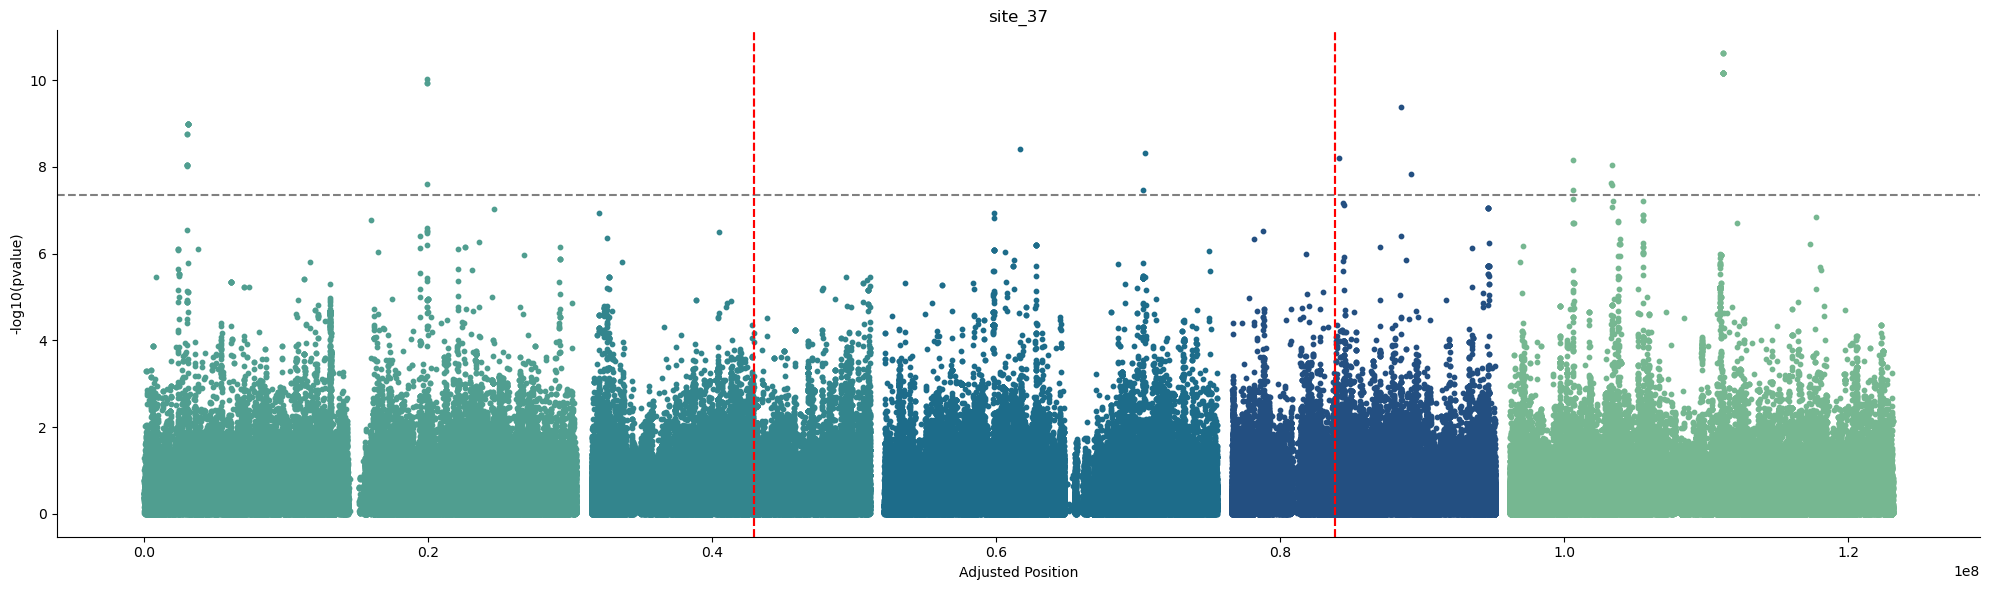

/tmp/ipykernel_78550/1658760834.py:39: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['adjusted_position'], subset['-log10(pvalue)'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)


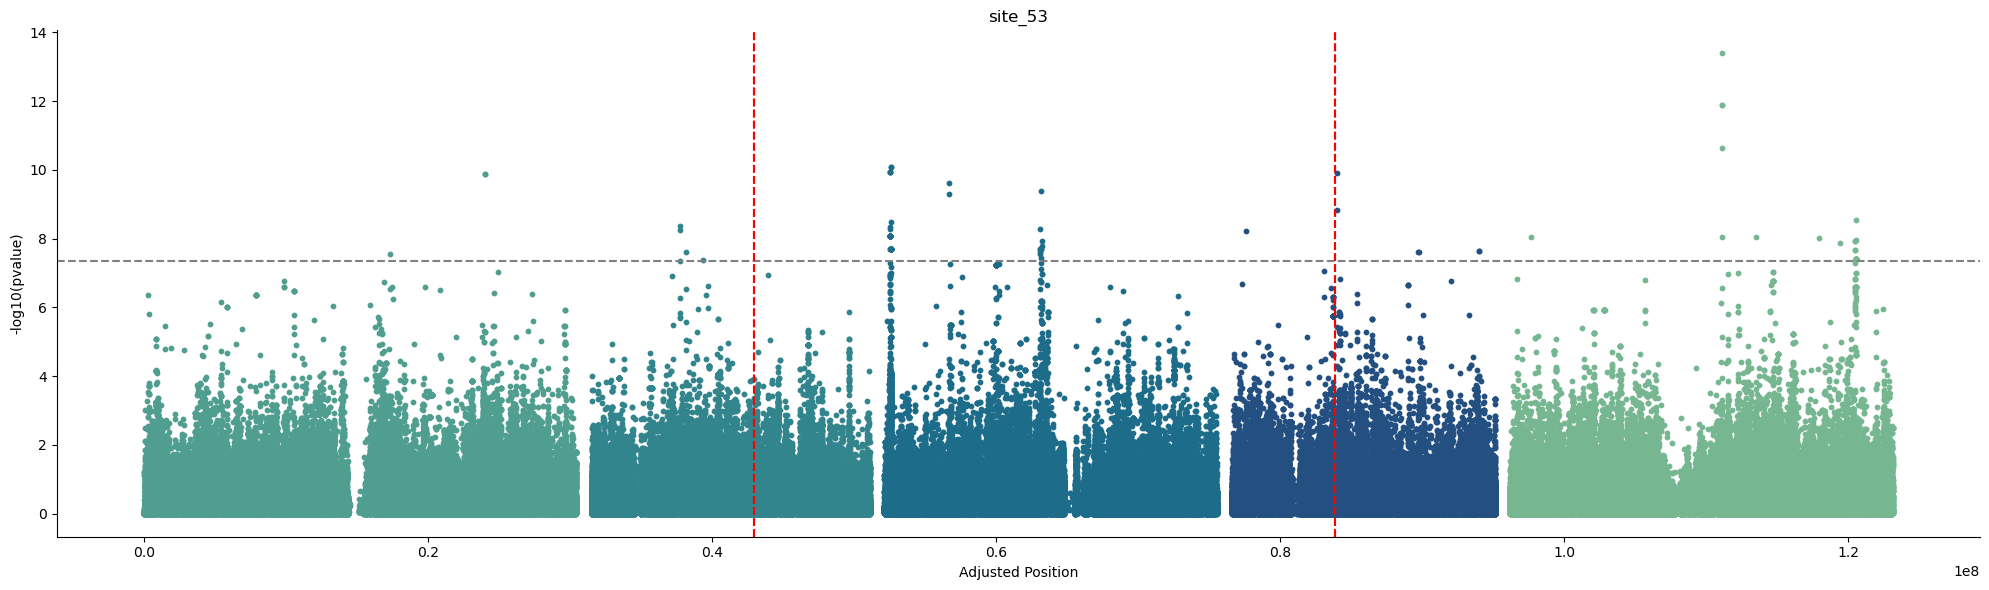

/tmp/ipykernel_78550/1658760834.py:39: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['adjusted_position'], subset['-log10(pvalue)'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)


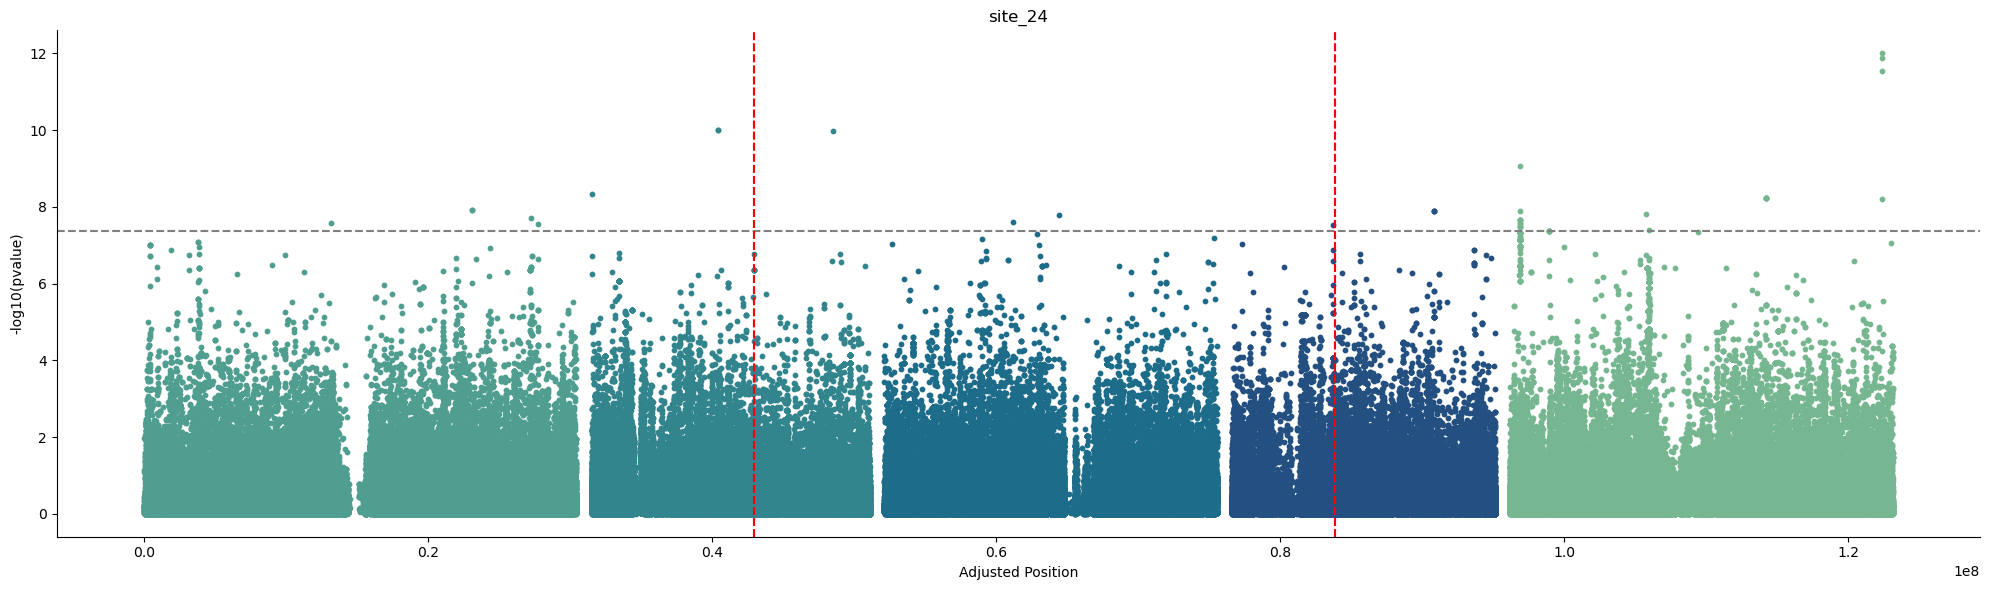

/tmp/ipykernel_78550/1658760834.py:39: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['adjusted_position'], subset['-log10(pvalue)'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)


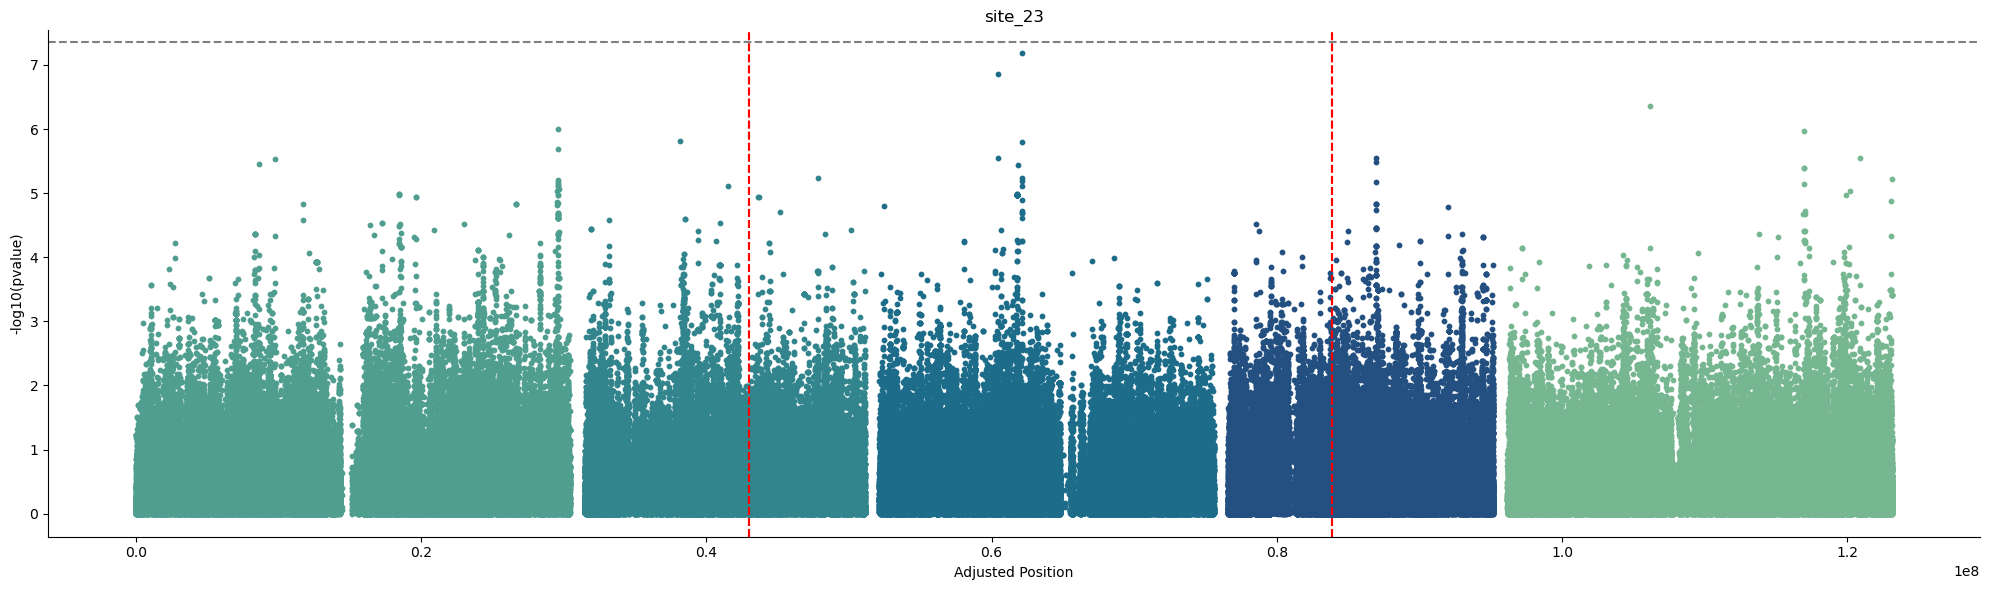

/tmp/ipykernel_78550/1658760834.py:39: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['adjusted_position'], subset['-log10(pvalue)'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)


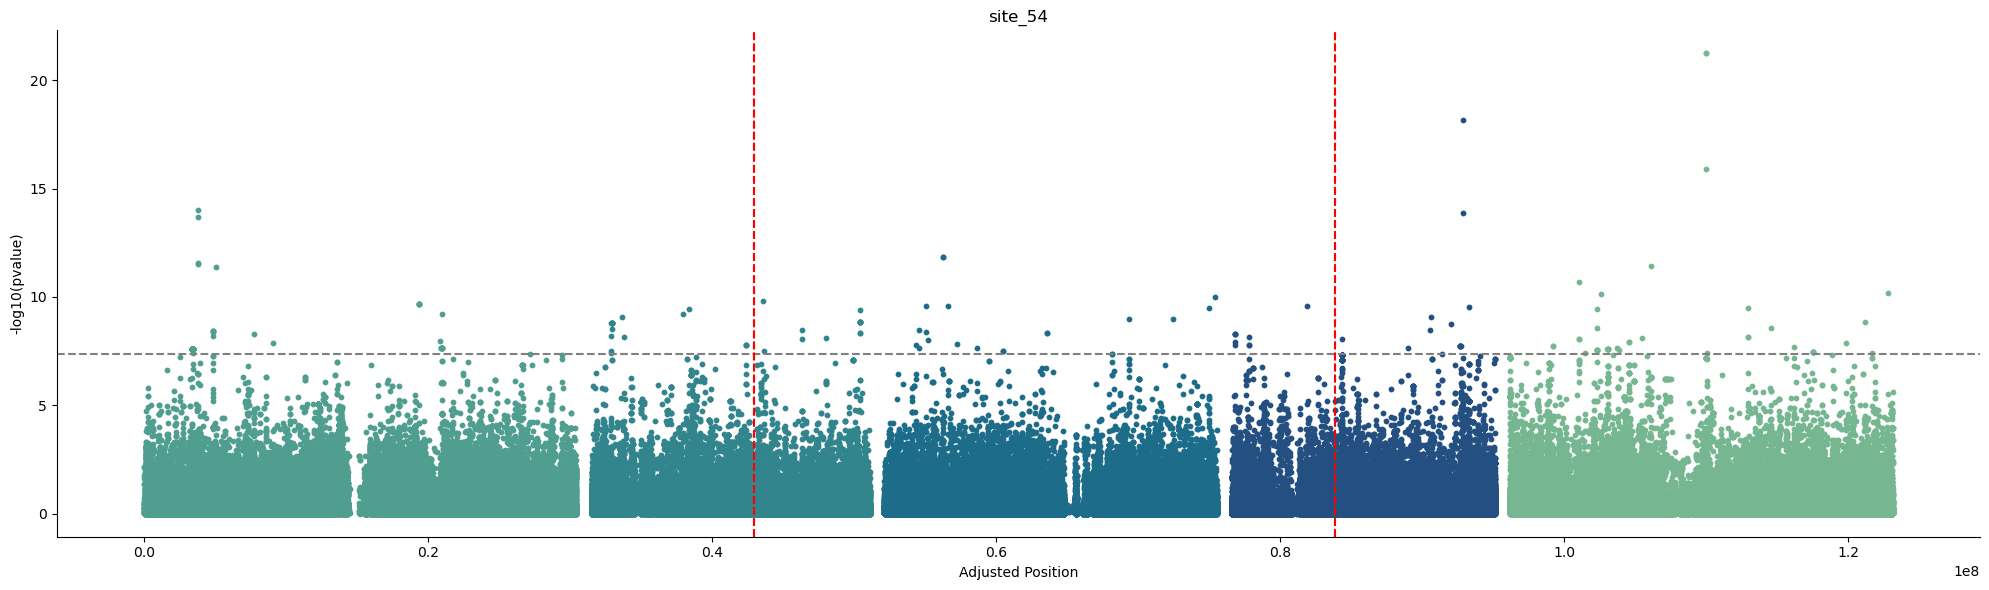

/tmp/ipykernel_78550/1658760834.py:39: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['adjusted_position'], subset['-log10(pvalue)'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)


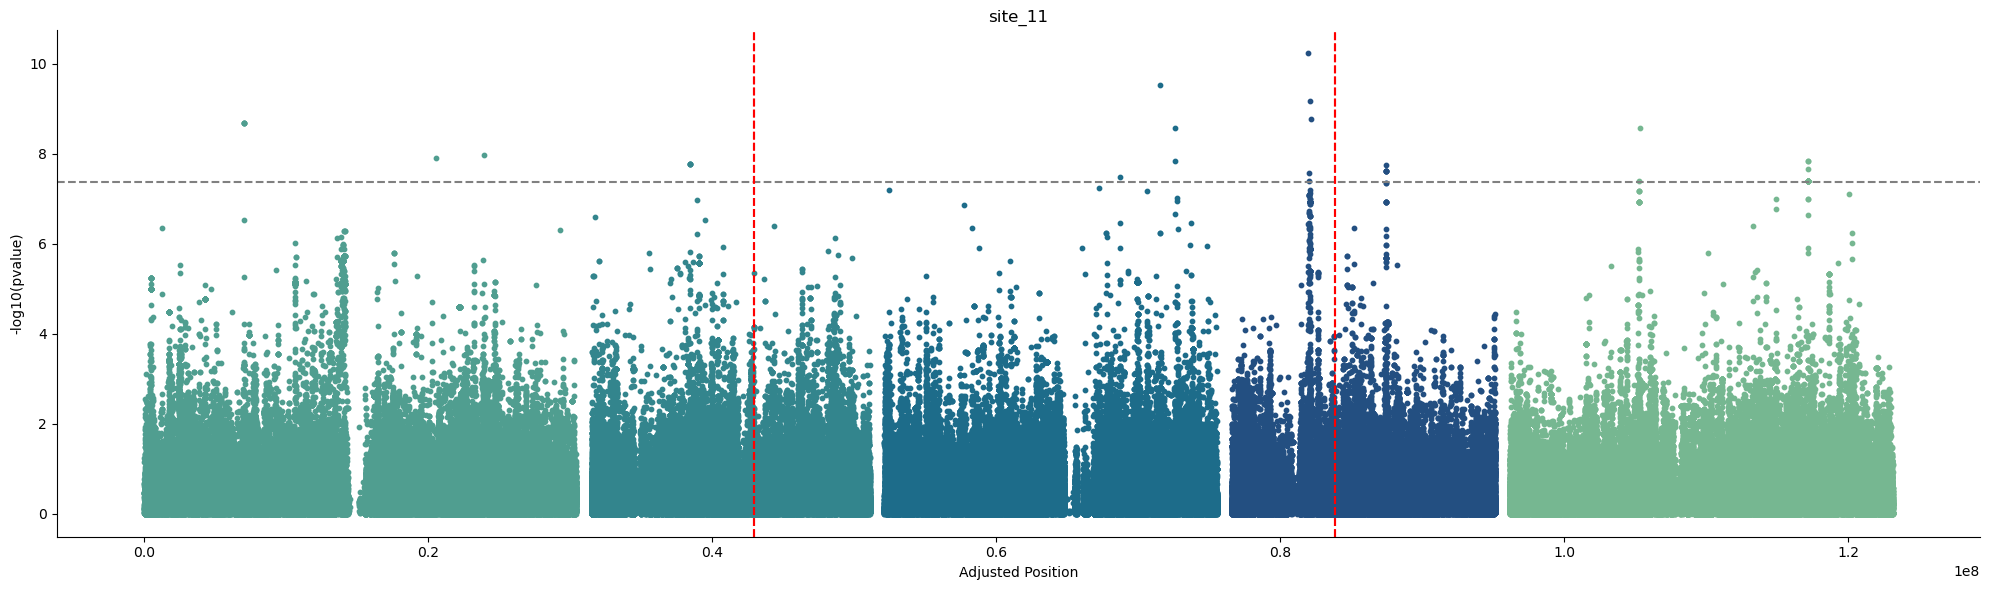

/tmp/ipykernel_78550/1658760834.py:39: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['adjusted_position'], subset['-log10(pvalue)'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)


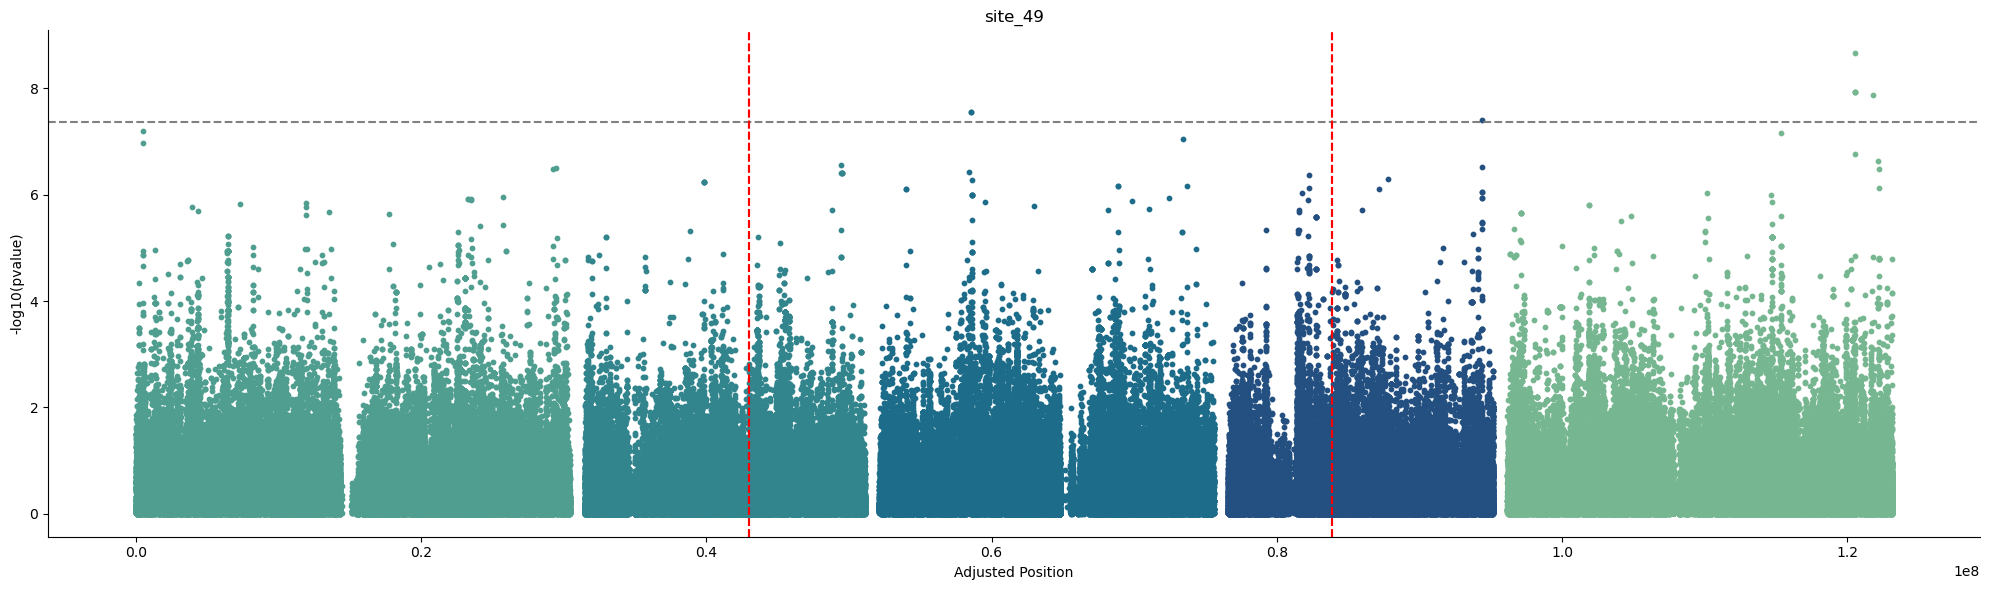

/tmp/ipykernel_78550/1658760834.py:39: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['adjusted_position'], subset['-log10(pvalue)'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)


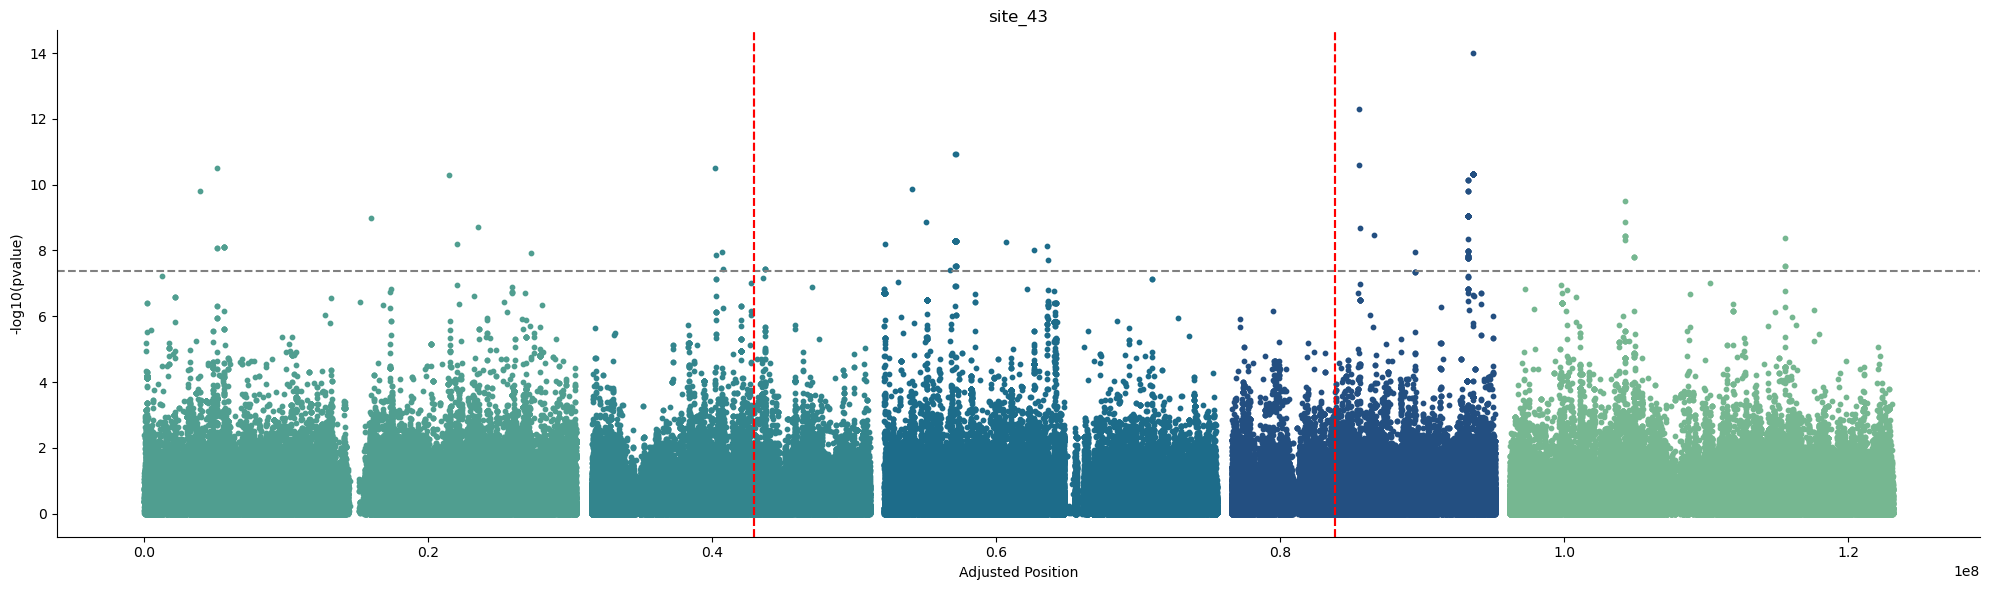

/tmp/ipykernel_78550/1658760834.py:39: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['adjusted_position'], subset['-log10(pvalue)'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)


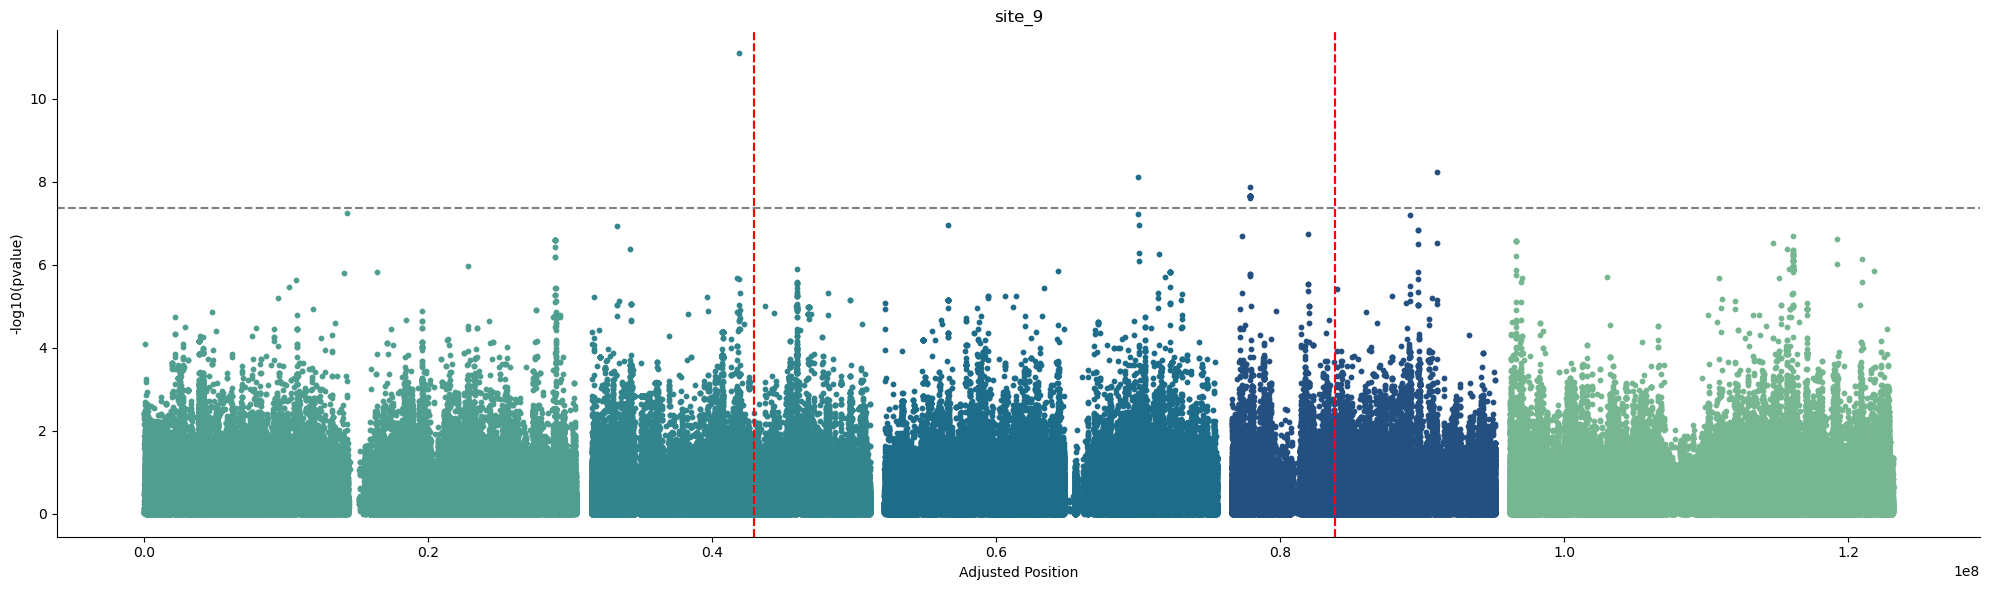

/tmp/ipykernel_78550/1658760834.py:39: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['adjusted_position'], subset['-log10(pvalue)'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)


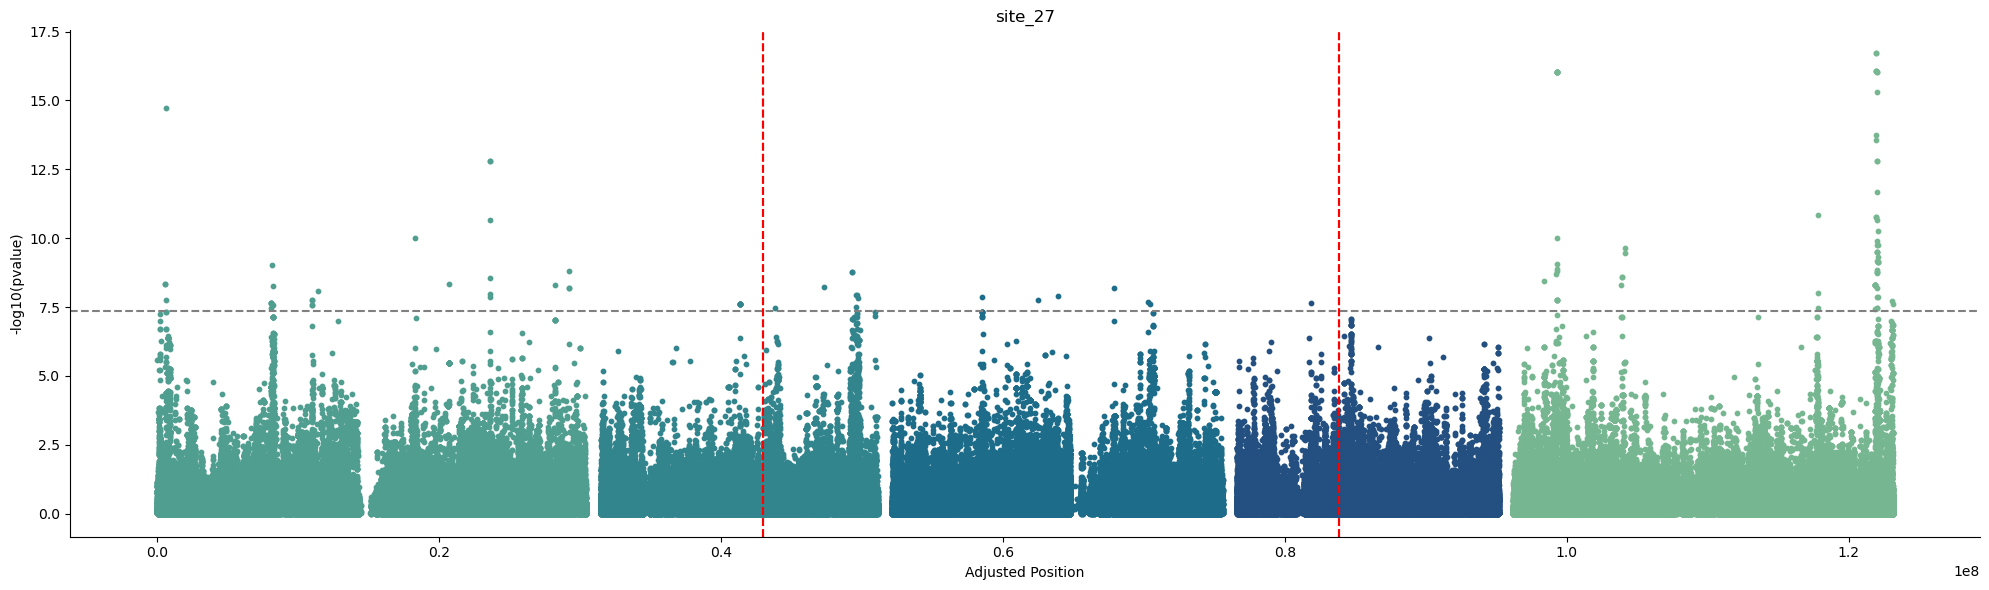

/tmp/ipykernel_78550/1658760834.py:39: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['adjusted_position'], subset['-log10(pvalue)'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)


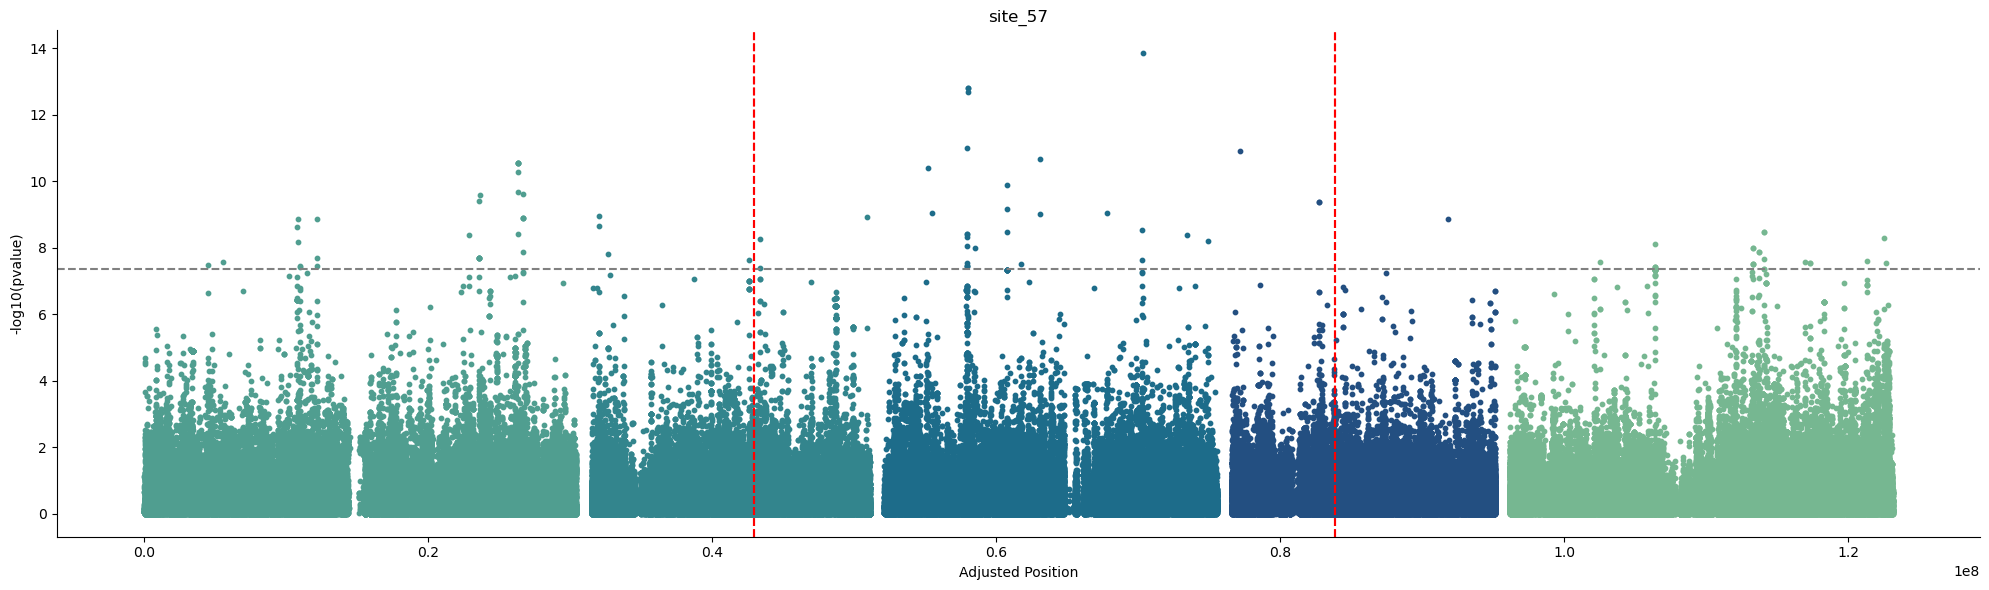

/tmp/ipykernel_78550/1658760834.py:39: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['adjusted_position'], subset['-log10(pvalue)'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)


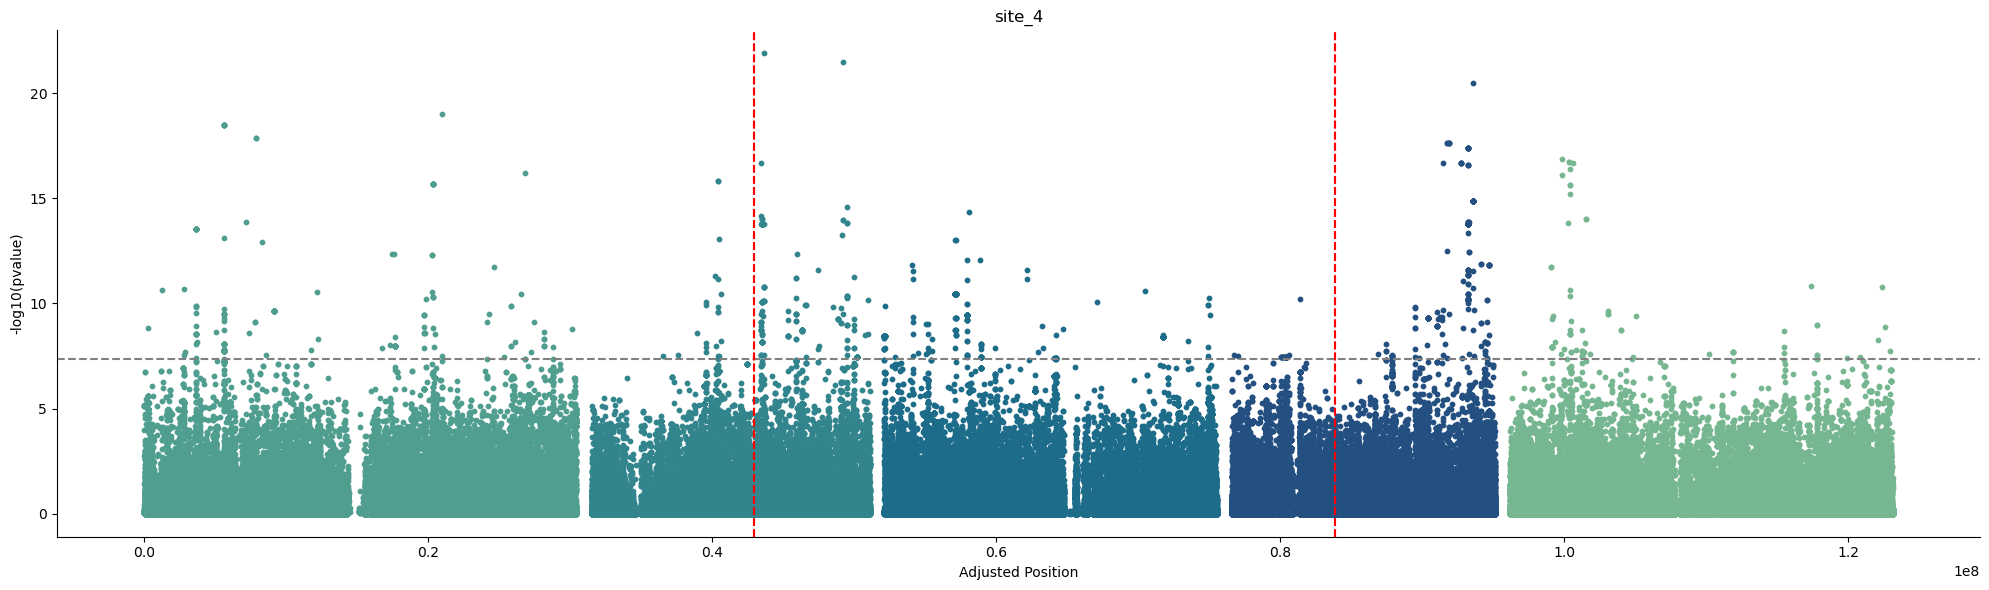

/tmp/ipykernel_78550/1658760834.py:39: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['adjusted_position'], subset['-log10(pvalue)'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)


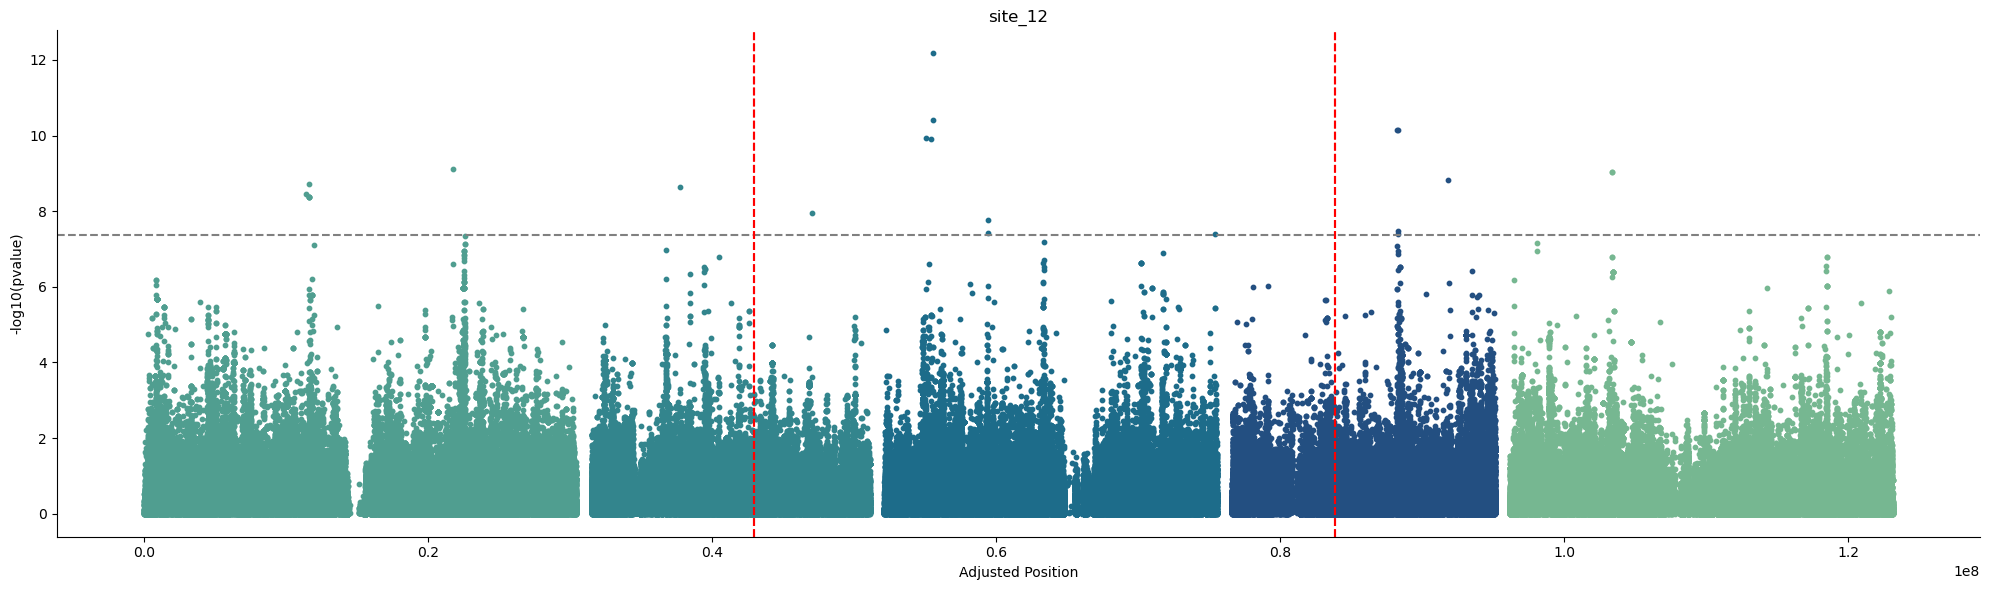

/tmp/ipykernel_78550/1658760834.py:39: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['adjusted_position'], subset['-log10(pvalue)'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)


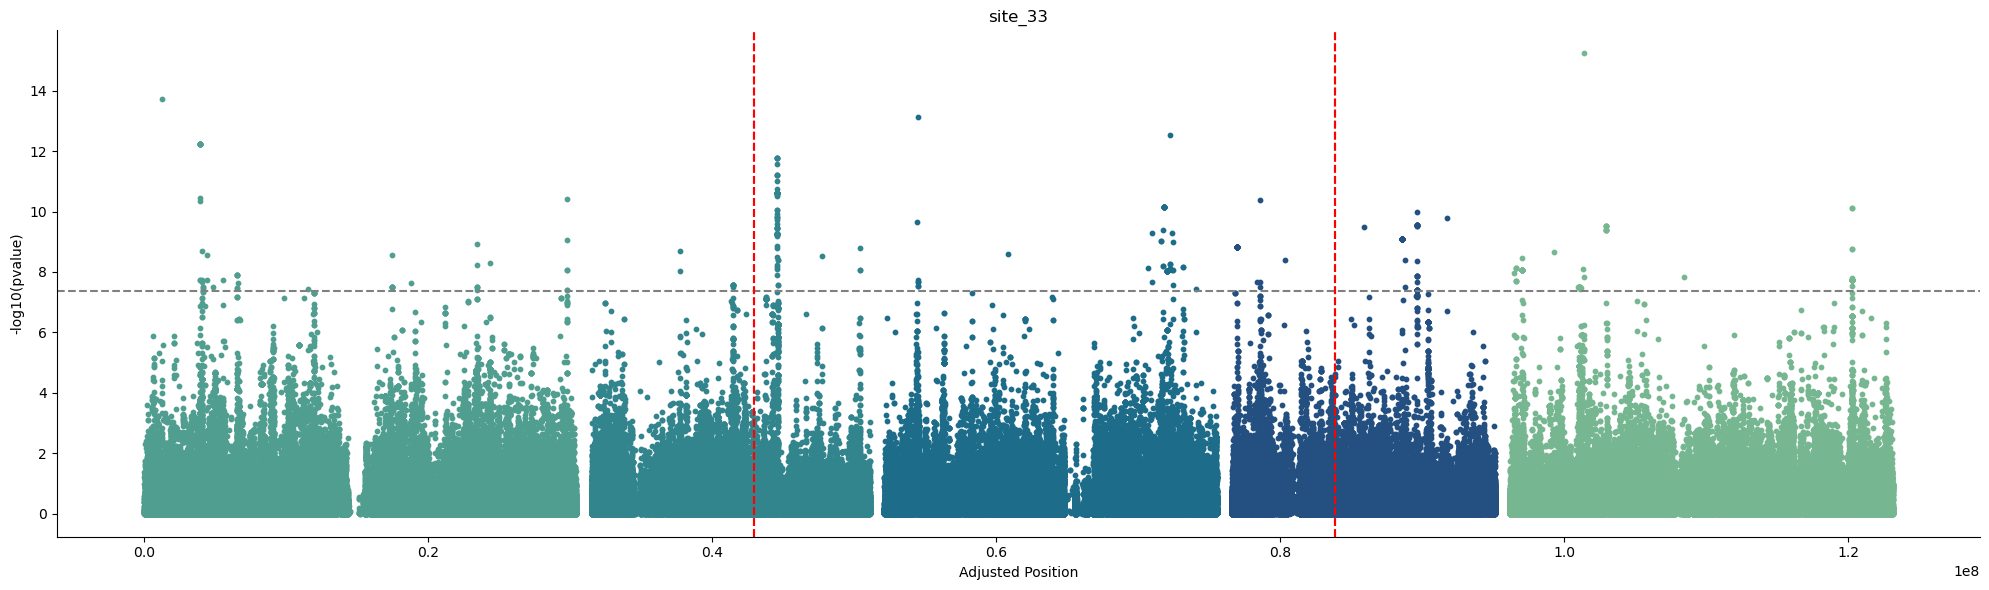

In [185]:
for site in sites:
    pvalues_file = path + f'/{site}/output/results_lmm.csv'
    
    pvalues = dd.read_csv(pvalues_file)
    pvalues = pvalues.compute()
    
    pvalues.columns = ['id', 'pvalue','beta', 'significant', 'blocks', 'MAF']
    
    threshold_value = 0.05 / len(pvalues)
    
    #sm.qqplot(pvalues['pvalue'], line ='45') 
    #py.show() 
    
    df = pvalues.copy()
    
    colors = sns.color_palette("crest", n_colors = 5)
    
    # Parsing chromosome number and position
    df['chromosome'] = df['id'].str.split('_').str[0].astype(int)
    df['position'] = df['id'].str.split('_').str[1].astype(int)
    df['-log10(pvalue)'] = -np.log10(df['pvalue'])
    
    # Calculate the offset for each chromosome to prevent overlap
    chromosome_offsets = {}
    offset = 0
    for chrom in sorted(df['chromosome'].unique()):
        chromosome_offsets[chrom] = offset
        max_position = df[df['chromosome'] == chrom]['position'].max()
        offset += max_position + 1000000  # Adding 1 million as a buffer between chromosomes
    
    # Apply offsets to positions
    df['adjusted_position'] = df.apply(lambda row: row['position'] + chromosome_offsets[row['chromosome']], axis=1)
    
    # Creating the Manhattan plot
    plt.figure(figsize=(20, 6))
    
    for chrom in sorted(df['chromosome'].unique()):
        subset = df[df['chromosome'] == chrom]
        plt.scatter(subset['adjusted_position'], subset['-log10(pvalue)'], c=colors[chrom % len(colors)], label=f'Chr {chrom}', s=10)
    
    # Aesthetics
    plt.xlabel('Adjusted Position')
    plt.ylabel('-log10(pvalue)')
    #plt.title('Manhattan Plot')
    #plt.grid(axis='y')
    #plt.legend(title="Chromosome", bbox_to_anchor=(1.05, 1), loc='upper left')
    ax = plt.gca()  # Get current axes
    ax.spines['top'].set_visible(False)  # Remove the top spine
    ax.spines['right'].set_visible(False)
    # Threshold line (optional)
    threshold = -np.log10(threshold_value)
    plt.axhline(y=threshold, color='grey', linestyle='dashed')
    plt.title(f'{site}')  # Set the title
    # Adding vertical lines for the specified positions
     #Adding vertical lines for the specified positions
    line_positions = ['2_11534165', '2_11534244', '4_7256526', '4_7267018']  # Additional positions
    
    for line_pos in line_positions:
        chrom, pos = map(int, line_pos.split('_'))
        adjusted_pos = pos + chromosome_offsets[chrom]
        plt.axvline(x=adjusted_pos, color='red', linestyle='dashed', label=f'Position {line_pos}')
    
    
    # Show the plot
    plt.tight_layout()
    #plt.savefig(path + f'/{site}/output/manhattan.png')
    plt.show()

In [183]:
pvalues

rs    p_wald      beta  significant  blocks    MAF
0             1_346  0.323513 -0.003340        False     1_0  0.273
1             1_353  0.848127  0.001062        False     1_0  0.069
2             1_363  0.751117 -0.001409        False     1_0  0.082
3             1_395  0.544591 -0.004057        False     1_0  0.056
4             1_396  0.544591 -0.004057        False     1_0  0.056
...             ...       ...       ...          ...     ...    ...
1147887  5_26975078  0.647047  0.001942        False  5_3110  0.139
1147888  5_26975121  0.116098 -0.008237        False  5_3110  0.061
1147889  5_26975148  0.116098 -0.008237        False  5_3110  0.061
1147890  5_26975272  0.246036  0.003378        False  5_3110  0.385
1147891  5_26975288  0.216528 -0.004469        False  5_3110  0.216

[1147892 rows x 6 columns]

In [114]:
sign_snps_number_dict = {}
sign_snps_names_dict = {}
sign_blocks_number_dict = {}
sign_blocks_names_dict = {}
for site in sites:
    site_number = int(site.replace('site_', ''))
    pvalues_file = path + f'/{site}/output/results_lmm.csv'
    
    pvalues = dd.read_csv(pvalues_file)
    pvalues = pvalues.compute()
    
    sign_snps_number = len(pvalues[pvalues['significant']==True])
    sign_snps_number_dict[site_number] = sign_snps_number

    sign_snps_names = pvalues[pvalues['significant']==True]['rs'].values
    sign_snps_names_dict[site_number] = sign_snps_names  

    sign_blocks_names = pvalues[pvalues['significant']==True]['blocks'].values
    sign_blocks_names_dict[site_number] = sign_blocks_names

In [160]:
sign_snps_number = pd.DataFrame([sign_snps_number_dict]).T.reset_index()

In [161]:
sign_snps_number.columns = ['site', 'sign_snps_number']

In [162]:
sign_snps_number = sign_snps_number.merge(climate)

In [163]:
#sign_snps_number['site'] = sign_snps_number['site'].astype(str)

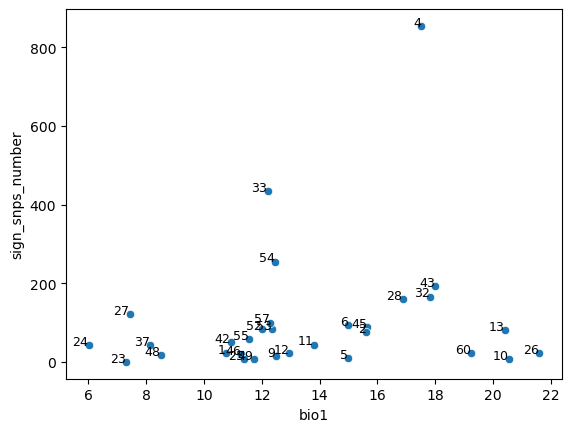

In [164]:
import seaborn as sns
import matplotlib.pyplot as plt

# Your existing scatterplot
sns.scatterplot(data=sign_snps_number, x='bio1', y='sign_snps_number')

# Loop through each point in the data and add the corresponding label
for i in range(sign_snps_number.shape[0]):
    plt.text(
        sign_snps_number['bio1'].iloc[i],        # X-coordinate (bio1)
        sign_snps_number['sign_snps_number'].iloc[i],  # Y-coordinate (sign_snps_number)
        sign_snps_number['site'].iloc[i],        # Label (site)
        fontsize=9,                              # Font size for the labels
        ha='right'                               # Align text to the right
    )

# Show the plot
plt.show()


In [ ]:
parallelism = pd.read_csv('../../key_files/generation_1_parallelism.txt',sep = '\t')

In [166]:
sign_snps_number = sign_snps_number.merge(parallelism, on = 'site')

In [168]:
sign_snps_number[sign_snps_number['source'] == 'snp']

site  sign_snps_number       bio1      mean     lower     upper  \
0     46                21  11.277027  0.558565  0.543584  0.573762   
2     55                58  11.564501  0.157314  0.126377  0.186234   
4     28               159  16.868309  0.104456  0.034784  0.169436   
6     10                 7  20.550923  0.233950  0.174433  0.287781   
8      6                94  14.989079  0.480042  0.425756  0.538647   
10     1                23  10.743906  0.399356  0.369797  0.428495   
12    60                22  19.248051  0.071068  0.036245  0.102571   
14    25                 7  11.393515  0.111906  0.085221  0.138089   
16    52                83  12.005284  0.176809  0.135817  0.217816   
18    32               166  17.815169  0.777680  0.762048  0.793780   
20    45                89  15.654286  0.437937  0.416335  0.460718   
22     5                 9  14.996355  0.691080  0.633978  0.756238   
24    13                81  20.412710  0.043040  0.018482  0.063527   
26     2                75  15.594627  0.073612  0.014468  0.128584   
28    26                23  21.603356  0.126738  0.083016  0.165651   
30    42                51  10.927050  0.285304  0.226082  0.344278   
32    48                18   8.506768  0.012254 -0.052310  0.065902   
34    37                42   8.130012  0.191096  0.158588  0.221810   
36    53                84  12.362217  0.257256  0.219137  0.295567   
38    24                42   6.008861  0.115742  0.082415  0.147796   
40    23                 0   7.290877  0.283928  0.244999  0.321623   
42    54               255  12.440169  0.684013  0.659835  0.708165   
44    11                44  13.801396  0.088494  0.058181  0.117339   
46    49                 8  11.721280  0.528235  0.492187  0.566210   
48    43               193  18.000951  0.649524  0.627028  0.671874   
50     9                14  12.481669  0.279275  0.248683  0.308896   
52    27               122   7.425145 -0.014482 -0.029989  0.000305   
54    57               100  12.276481  0.206702  0.170691  0.239138   
56     4               854  17.513474  0.695603  0.680184  0.711607   
58    12                23  12.957162  0.100474  0.071537  0.126819   

    generation source  
0            1    snp  
2            1    snp  
4            1    snp  
6            1    snp  
8            1    snp  
10           1    snp  
12           1    snp  
14           1    snp  
16           1    snp  
18           1    snp  
20           1    snp  
22           1    snp  
24           1    snp  
26           1    snp  
28           1    snp  
30           1    snp  
32           1    snp  
34           1    snp  
36           1    snp  
38           1    snp  
40           1    snp  
42           1    snp  
44           1    snp  
46           1    snp  
48           1    snp  
50           1    snp  
52           1    snp  
54           1    snp  
56           1    snp  
58           1    snp

In [188]:
unique_ecotypes = pd.read_csv('../../key_files/unique_ecotypes.csv')

In [191]:
unique_ecotypes_persite = unique_ecotypes.groupby('site')['unique_ecotypes'].mean().reset_index()

In [197]:
shannon_div = pd.read_csv('../../key_files/shannon_div.csv')


In [198]:
shannon_div = shannon_div.groupby('site')['0'].mean().reset_index()

In [200]:
shannon_div.columns = ['site', 'shannon_div']

In [201]:
sign_snps_number = sign_snps_number.merge(shannon_div)

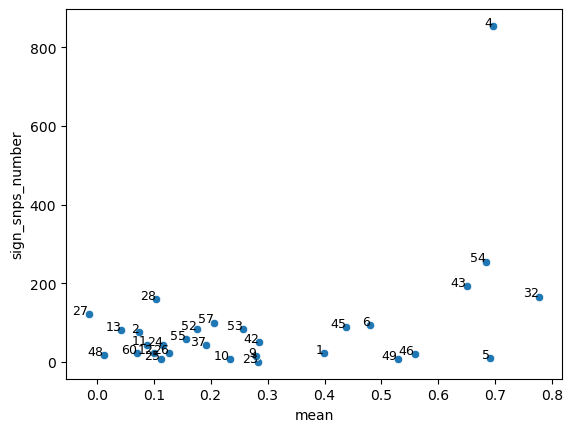

In [173]:
import seaborn as sns
import matplotlib.pyplot as plt
filter = sign_snps_number[sign_snps_number['source'] == 'snp']
# Your existing scatterplot
sns.scatterplot(data=filter, x='mean', y='sign_snps_number')

# Loop through each point in the data and add the corresponding label
for i in range(filter.shape[0]):
    plt.text(
        filter['mean'].iloc[i],        # X-coordinate (bio1)
        filter['sign_snps_number'].iloc[i],  # Y-coordinate (sign_snps_number)
        filter['site'].iloc[i],        # Label (site)
        fontsize=9,                              # Font size for the labels
        ha='right'                               # Align text to the right
    )

# Show the plot
plt.show()


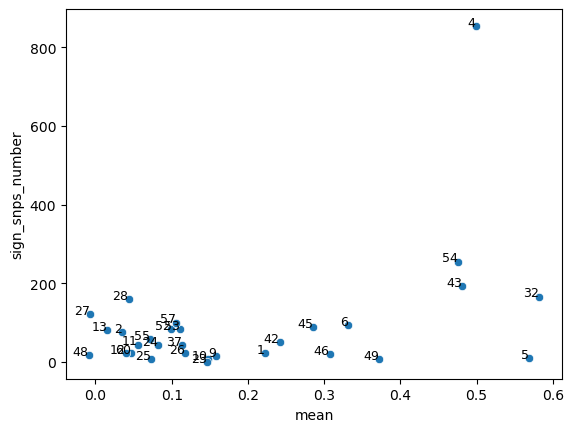

In [174]:
import seaborn as sns
import matplotlib.pyplot as plt
filter = sign_snps_number[sign_snps_number['source'] == 'ecotype']
# Your existing scatterplot
sns.scatterplot(data=filter, x='mean', y='sign_snps_number')

# Loop through each point in the data and add the corresponding label
for i in range(filter.shape[0]):
    plt.text(
        filter['mean'].iloc[i],        # X-coordinate (bio1)
        filter['sign_snps_number'].iloc[i],  # Y-coordinate (sign_snps_number)
        filter['site'].iloc[i],        # Label (site)
        fontsize=9,                              # Font size for the labels
        ha='right'                               # Align text to the right
    )

# Show the plot
plt.show()


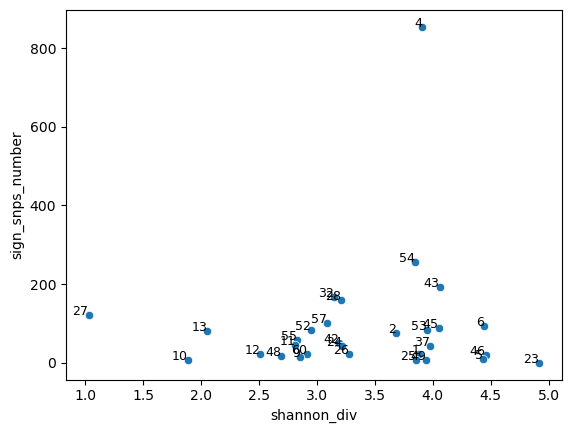

In [204]:
import seaborn as sns
import matplotlib.pyplot as plt
filter = sign_snps_number[sign_snps_number['source'] == 'snp']
# Your existing scatterplot
sns.scatterplot(data=filter, x='shannon_div', y='sign_snps_number')

# Loop through each point in the data and add the corresponding label
for i in range(filter.shape[0]):
    plt.text(
        filter['shannon_div'].iloc[i],        # X-coordinate (bio1)
        filter['sign_snps_number'].iloc[i],  # Y-coordinate (sign_snps_number)
        filter['site'].iloc[i],        # Label (site)
        fontsize=9,                              # Font size for the labels
        ha='right'                               # Align text to the right
    )

# Show the plot
plt.show()

In [175]:
from itertools import combinations

# Find all pairwise combinations of sites
pairwise_intersections = {}
for (site1, site2) in combinations(sign_snps_names_dict.keys(), 2):
    # Convert lists to sets and find the intersection
    intersection = set(sign_snps_names_dict[site1]).intersection(set(sign_snps_names_dict[site2]))
    
    # Store the result in a dictionary with the pair of sites as the key
    pairwise_intersections[(site1, site2)] = intersection

In [176]:
filtered_intersections = {pair: blocks for pair, blocks in pairwise_intersections.items() if blocks}

In [177]:
climate = pd.read_csv('../../key_files/bioclimvars_experimental_sites_era5.csv')[['site', 'bio1']]

climatic_distances = []
for (site1, site2) in combinations(climate['site'], 2):
    bio1_site1 = climate.loc[climate['site'] == site1, 'bio1'].values[0]
    bio1_site2 = climate.loc[climate['site'] == site2, 'bio1'].values[0]
    distance = (bio1_site1 - bio1_site2) ** 2
    climatic_distances.append({'site_pair': (site1, site2), 'climatic_distance': distance})


climatic_distances_df = pd.DataFrame(climatic_distances)


# Add a column for number of shared SNPs to the climatic_distances_df
climatic_distances_df['shared_snps'] = climatic_distances_df['site_pair'].apply(
    lambda pair: len(filtered_intersections.get(pair, []))
)

# Add a column for number of shared SNPs to the climatic_distances_df
climatic_distances_df['shared_snps_names'] = climatic_distances_df['site_pair'].apply(
    lambda pair: filtered_intersections.get(pair, [])
)
# Step 3: Calculate the correlation between climatic distance and shared SNPs
#correlation = climatic_distances_df['climatic_distance'].corr(climatic_distances_df['shared_snps'])

In [180]:
climatic_distances_df[climatic_distances_df['shared_snps']!=0]

site_pair  climatic_distance  shared_snps  \
16    (1, 32)          50.002763            2   
20     (1, 4)          45.827061            2   
34    (1, 54)           2.877309            5   
257    (2, 4)           3.681977            1   
458   (26, 4)          16.727130            2   
598   (32, 4)           0.091020            5   
600  (32, 42)          47.446177            1   
601  (32, 43)           0.034515            9   
602  (32, 45)           4.669413            3   
607   (32, 5)           7.945710            1   
891  (52, 53)           0.127401            1   

                                     shared_snps_names  
16                              {1_5086645, 1_5086459}  
20                              {5_4289113, 5_4288893}  
34   {5_6182499, 5_6179031, 5_6177847, 5_6175237, 5...  
257                                        {5_4283251}  
458                             {2_6178048, 5_3592628}  
598  {4_12917912, 4_12922135, 4_12922156, 4_1291788...  
600                                        {1_2929138}  
601  {2_12310605, 4_12917912, 1_5104881, 4_8953306,...  
602                  {1_5104881, 1_5091879, 1_5105013}  
607                                         {3_415092}  
891                                        {4_7435441}

In [115]:
from itertools import combinations

# Find all pairwise combinations of sites
pairwise_intersections_blocks = {}
for (site1, site2) in combinations(sign_blocks_names_dict.keys(), 2):
    # Convert lists to sets and find the intersection
    intersection = set(sign_blocks_names_dict[site1]).intersection(set(sign_blocks_names_dict[site2]))
    
    # Store the result in a dictionary with the pair of sites as the key
    pairwise_intersections_blocks[(site1, site2)] = intersection

In [116]:
filtered_intersections_blocks = {pair: blocks for pair, blocks in pairwise_intersections_blocks.items() if blocks}

In [117]:
climate = pd.read_csv('../../key_files/bioclimvars_experimental_sites_era5.csv')[['site', 'bio1']]

climatic_distances = []
for (site1, site2) in combinations(climate['site'], 2):
    bio1_site1 = climate.loc[climate['site'] == site1, 'bio1'].values[0]
    bio1_site2 = climate.loc[climate['site'] == site2, 'bio1'].values[0]
    distance = (bio1_site1 - bio1_site2) ** 2
    climatic_distances.append({'site_pair': (site1, site2), 'climatic_distance': distance})


climatic_distances_df_blocks = pd.DataFrame(climatic_distances)


# Add a column for number of shared SNPs to the climatic_distances_df
climatic_distances_df_blocks['shared_blocks'] = climatic_distances_df_blocks['site_pair'].apply(
    lambda pair: len(filtered_intersections_blocks.get(pair, []))
)

# Add a column for number of shared SNPs to the climatic_distances_df
climatic_distances_df_blocks['shared_blocks_names'] = climatic_distances_df_blocks['site_pair'].apply(
    lambda pair: filtered_intersections_blocks.get(pair, [])
)
# Step 3: Calculate the correlation between climatic distance and shared SNPs
#correlation = climatic_distances_df['climatic_distance'].corr(climatic_distances_df['shared_snps'])

<Axes: xlabel='climatic_distance', ylabel='shared_blocks'>

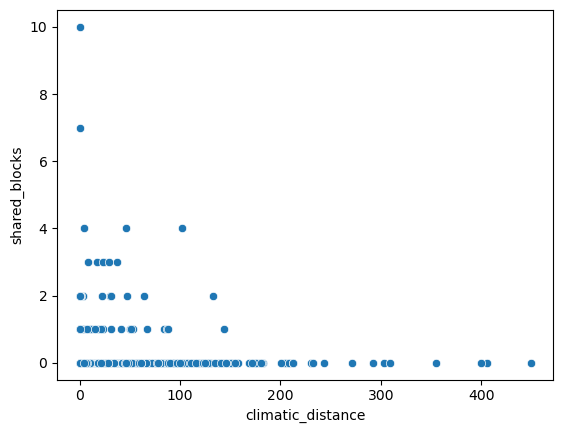

In [121]:
sns.scatterplot(climatic_distances_df_blocks, x = 'climatic_distance', y='shared_blocks')

In [124]:
climatic_distances_df_blocks.sort_values('shared_blocks',ascending=False).head(10)

site_pair  climatic_distance  shared_blocks  \
598   (32, 4)           0.091020             10   
601  (32, 43)           0.034515              7   
602  (32, 45)           4.669413              4   
20     (1, 4)          45.827061              4   
488   (27, 4)         101.774390              4   
612  (32, 54)          28.890625              3   
24    (1, 45)          24.111838              3   
458   (26, 4)          16.727130              3   
427   (25, 4)          37.453902              3   
505  (27, 57)          23.535461              3   

                                   shared_blocks_names  
598  {1_590, 5_3028, 5_953, 2_930, 1_2407, 5_396, 3...  
601  {1_590, 4_1406, 2_945, 3_328, 2_1315, 2_1314, ...  
602                      {2_930, 1_590, 1_3260, 5_403}  
20                      {1_590, 4_2740, 3_3151, 5_414}  
488                   {5_3028, 2_1915, 1_1079, 3_2708}  
612                              {3_328, 3_502, 1_590}  
24                              {1_590, 2_1967, 5_549}  
458                              {5_396, 2_680, 5_953}  
427                            {1_2407, 1_2853, 3_338}  
505                            {3_2702, 3_589, 1_3923}

In [127]:
# Flatten the list of shared blocks and count their occurrences
block_count = {}

for blocks in climatic_distances_df_blocks['shared_blocks_names']:
    for block in blocks:
        if block in block_count:
            block_count[block] += 1
        else:
            block_count[block] = 1

# Convert the count dictionary into a dataframe and sort by most frequent blocks
block_count_df = pd.DataFrame(list(block_count.items()), columns=['block', 'count']).sort_values(by='count', ascending=False)


In [128]:
block_count_df

block  count                                         site_pairs
0    1_590     10  [(1, 32), (1, 4), (1, 43), (1, 45), (1, 54), (...
1   1_2407      5   [(25, 32), (25, 33), (25, 4), (32, 33), (32, 4)]
2   4_2584      4               [(2, 4), (2, 43), (32, 4), (32, 43)]
3   3_1381      3                     [(52, 53), (52, 57), (53, 57)]
4     3_31      3                       [(32, 5), (32, 53), (5, 53)]
..     ...    ...                                                ...
66  2_1874      1                                          [(28, 4)]
67   2_692      1                                         [(12, 33)]
68   2_529      1                                         [(28, 54)]
69   3_554      1                                         [(28, 57)]
70   5_519      1                                         [(54, 57)]

[71 rows x 3 columns]

In [120]:
climatic_distances_df_blocks[climatic_distances_df_blocks['shared_blocks']!=0]

site_pair  climatic_distance  shared_blocks  \
5      (1, 2)          23.529494              1   
16    (1, 32)          50.002763              1   
17    (1, 33)           2.116435              1   
19    (1, 37)           6.832440              1   
20     (1, 4)          45.827061              4   
..        ...                ...            ...   
891  (52, 53)           0.127401              2   
892  (52, 54)           0.189125              2   
895  (52, 57)           0.073548              2   
904  (53, 57)           0.007351              1   
912  (54, 57)           0.026794              2   

                shared_blocks_names  
5                           {5_414}  
16                          {1_590}  
17                         {4_2740}  
19                          {5_549}  
20   {1_590, 4_2740, 3_3151, 5_414}  
..                              ...  
891                 {3_1381, 4_814}  
892                 {5_542, 3_3090}  
895                {1_4736, 3_1381}  
904                        {3_1381}  
912                 {3_3290, 5_519}  

[63 rows x 4 columns]

In [113]:
climatic_distances_df[climatic_distances_df['shared_snps']!=0]

site_pair  climatic_distance  shared_snps  \
16    (1, 32)          50.002763            2   
20     (1, 4)          45.827061            2   
34    (1, 54)           2.877309            5   
257    (2, 4)           3.681977            1   
458   (26, 4)          16.727130            2   
598   (32, 4)           0.091020            5   
600  (32, 42)          47.446177            1   
601  (32, 43)           0.034515            9   
602  (32, 45)           4.669413            3   
607   (32, 5)           7.945710            1   
891  (52, 53)           0.127401            1   

                                     shared_snps_names  
16                              {1_5086645, 1_5086459}  
20                              {5_4289113, 5_4288893}  
34   {5_6182499, 5_6179031, 5_6177847, 5_6175237, 5...  
257                                        {5_4283251}  
458                             {2_6178048, 5_3592628}  
598  {4_12917912, 4_12922135, 4_12922156, 4_1291788...  
600                                        {1_2929138}  
601  {2_12310605, 4_12917912, 1_5104881, 4_8953306,...  
602                  {1_5104881, 1_5091879, 1_5105013}  
607                                         {3_415092}  
891                                        {4_7435441}

In [69]:
filtered_intersections = {pair: blocks for pair, blocks in pairwise_intersections.items() if blocks}